# Projeto : Churn Prediction

## Introdução

### 🇧🇷 Análise e Ciência de Dados para a Previsão de Churn em Instituições Financeiras

   A evolução exponencial da capacidade de coleta e armazenamento de dados impulsionou uma revolução na forma como entendemos, interpretamos e utilizamos informações para tomar decisões estratégicas. No contexto das instituições financeiras, a análise de dados desempenha um papel vital na compreensão do comportamento dos clientes e na antecipação de eventos cruciais, como o churn, um desafio premente enfrentado por muitos bancos.
    Este projeto se concentra na aplicação de técnicas avançadas de análise e ciência de dados para prever o churn de clientes em um ambiente bancário. Utilizando uma abordagem centrada em machine learning e manipulação eficiente de dados, exploramos não apenas a identificação de padrões de comportamento, mas também a criação de modelos preditivos robustos capazes de antecipar o churn com precisão.
    A análise começa com a compreensão aprofundada dos dados disponíveis, explorando variáveis-chave e examinando correlações significativas. Em seguida, o pré-processamento minucioso e a engenharia de características são aplicados para otimizar a entrada dos algoritmos de machine learning. 

   Além da entrega de resultados preditivos, este projeto busca fornecer insights acionáveis para os stakeholders do setor financeiro. A interpretação dos modelos e a análise das principais características que influenciam o churn visam fornecer uma compreensão mais profunda dos fatores que impactam a lealdade do cliente, permitindo estratégias proativas para a retenção e engajamento eficaz.

   Neste documento, apresentamos não apenas os resultados obtidos, mas também o processo metodológico completo, garantindo transparência e replicabilidade. Esperamos que este projeto não apenas ofereça uma solução valiosa para a previsão de churn em instituições financeiras, mas também contribua para o avanço contínuo da análise de dados no setor.

---

### 🇺🇸 Analysis and Data Science for Churn Prediction in Financial Institutions
   The exponential evolution in data collection and storage capabilities has driven a revolution in how we understand, interpret, and utilize information to make strategic decisions. Within the realm of financial institutions, data analysis plays a pivotal role in understanding customer behavior and predicting crucial events like churn, a pressing challenge faced by many banks. This project focuses on employing advanced data analysis techniques and science to predict customer churn in a banking environment. By adopting a machine learning-centric approach and efficient data handling, we delve not only into identifying behavioral patterns but also constructing robust predictive models capable of accurately anticipating churn. The analysis commences with a deep understanding of available data, exploring key variables and scrutinizing significant correlations. Subsequently, meticulous preprocessing and feature engineering are applied to optimize the input for machine learning algorithms.

Beyond delivering predictive outcomes, this project aims to provide actionable insights for stakeholders in the financial sector. Interpreting models and analyzing key influencing factors on churn seek to offer a deeper understanding of elements impacting customer loyalty, enabling proactive strategies for retention and effective engagement.

In this document, we present not only the obtained results but also the complete methodological process, ensuring transparency and replicability. We hope this project not only offers a valuable solution for predicting churn in financial institutions but also contributes to the ongoing advancement of data analysis within the sector.

### Lendo arquivos

In [77]:
# bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings(action = 'ignore')

In [78]:
import pandas as pd
from kaggle.api.kaggle_api_extended import KaggleApi
import os

# Configurar a chave de autenticação do Kaggle
api = KaggleApi()
api.authenticate()
# Baixar o dataset do Kaggle
api.dataset_download_files('pentakrishnakishore/bank-customer-churn-data', path='.', unzip=True)

# Ler o arquivo CSV no DataFrame
data = pd.read_csv('churn_prediction.csv')

# Agora você pode usar o DataFrame 'df' conforme necessário

# Deletar o arquivo do disco rígido para economizar espaço
os.remove('churn_prediction.csv')

### Bank Customer Churn Data
About Dataset
    The churn prediction dataset, which contains raw data of 28,382 customers. The dataset includes the following columns
    
   **customer_id:** Unique identifier for each customer.  
   **vintage:** The duration of the customer's relationship with the company.  
   **age:** Age of the customer.  
   **gender:** Gender of the customer.  
   **dependents:** Number of dependents the customer has.  
   **occupation:** The occupation of the customer.  
   **city:** City in which the customer is located.  
   **customer_nw_category:** Net worth category of the customer.  
   **branch_code:** Code identifying the branch associated with the customer.  
   **current_balance:** Current balance in the customer's account.  
   **previous_month_end_balance:** Account balance at the end of the previous month.  
   **average_monthly_balance_prevQ:** Average monthly balance in the previous quarter.  
   **average_monthly_balance_prevQ2:** Average monthly balance in the second previous quarter.  
   **current_month_credit:** Credit amount in the current month.  
   **previous_month_credit:** Credit amount in the previous month.  
   **current_month_debit:** Debit amount in the current month.  
   **previous_month_debit:** Debit amount in the previous month.  
   **current_month_balance:** Account balance in the current month.  
   **previous_month_balance:** Account balance in the previous month.  
   **churn:** The target variable indicating whether the customer has churned (1 for churned, 0 for not churned).  
   **last_transaction:** Timestamp of the customer's last transaction.  
    
   This dataset provides a comprehensive view of various attributes related to the customers' banking activities. With these features, it becomes possible to build predictive models to identify potential churners based on historical and current customer behavior. The dataset's size allows for robust analysis and modeling to improve customer retention strategies.

_____________
  🇺🇸 to 🇧🇷

- **customer_id**: Identificação do cliente
- **vintage**: Tempo desde a primeira transação do cliente (em meses)
- **age**: Idade do cliente
- **gender**: Gênero do cliente
- **dependents**: Número de dependentes do cliente
- **occupation**: Ocupação do cliente
- **city**: Cidade do cliente
- **customer_nw_category**: Categoria de patrimônio líquido do cliente
- **branch_code**: Código da agência do cliente
- **current_balance**: Saldo atual na conta
- **previous_month_end_balance**: Saldo no final do mês anterior
- **average_monthly_balance_prevQ**: Saldo médio mensal no trimestre anterior
- **average_monthly_balance_prevQ2**: Saldo médio mensal no segundo trimestre anterior
- **current_month_credit**: Crédito no mês atual
- **previous_month_credit**: Crédito no mês anterior
- **current_month_debit**: Débito no mês atual
- **previous_month_debit**: Débito no mês anterior
- **current_month_balance**: Saldo atual no mês
- **previous_month_balance**: Saldo no mês anterior
- **churn**: Variável alvo indicando se o cliente cancelou (1) ou não cancelou (0)
- **last_transaction**: Data da última transação

In [79]:
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03


In [80]:
data.tail()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
28377,30297,2325,10,Female,0.0,student,1020.0,2,1207,1076.43,1076.43,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0,2019-10-22
28378,30298,1537,34,Female,0.0,self_employed,1046.0,2,223,3844.10,4069.21,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0,2019-12-17
28379,30299,2376,47,Male,0.0,salaried,1096.0,2,588,65511.97,61017.55,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1,2019-12-31
28380,30300,1745,50,Male,3.0,self_employed,1219.0,3,274,1625.55,1625.55,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,0,NaT
28381,30301,1175,18,Male,0.0,student,1232.0,2,474,2107.05,2821.34,3213.44,4447.45,0.11,7.44,714.40,1094.09,2402.62,3260.58,1,2019-11-02


In [81]:
data.shape

(28382, 21)

In [82]:
# Imprimindo todas as colunas presentes nos dados
data.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn',
       'last_transaction'],
      dtype='object')

#### Identificação de Variável e Typecasting

In [83]:
# Uma análise mais detalhada dos tipos de dados presentes nos dados
data.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
last_transaction                   object
dtype: object

OBS: Há muitas variáveis visíveis de uma vez, então vamos reduzir isso olhando **um tipo de dado de cada vez**. Vamos começar com inteiros.


#### Tipo de Dado Inteiro

In [84]:
# Identificando variáveis com tipo de dado inteiro
data.dtypes[data.dtypes == 'int64']

customer_id             int64
vintage                 int64
age                     int64
customer_nw_category    int64
branch_code             int64
churn                   int64
dtype: object

OBS
- **ID do Cliente**: Um número único atribuído aos clientes, adequado como inteiro.
- **Código da Filial**: Representa diferentes filiais, deve ser convertido para uma categoria.
- **Idade** e **Vintage**: Valores numéricos, adequados como inteiros.
- **Categoria de Patrimônio Líquido do Cliente**: Deve ser uma categoria ordinal, deve ser convertida para um tipo de dado categórico.
- **Churn**: 1 representa saída, 0 representa não saída. No entanto, não há comparação entre essas duas categorias. Isso precisa ser convertido para um tipo de dado categórico.


In [85]:
# converting churn to category
data['churn'] = data['churn'].astype('category')
data['branch_code'] = data['branch_code'].astype('category')
data['customer_nw_category'] = data['customer_nw_category'].astype('category')
data.dtypes[data.dtypes == 'int64']

customer_id    int64
vintage        int64
age            int64
dtype: object

#### Tipo de Dado Float


In [86]:
# Convertendo churn para categoria
data.dtypes[data.dtypes == 'float64']

dependents                        float64
city                              float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
dtype: object

OBS:
- **dependents**: Espera-se que seja um número inteiro. **Deve ser alterado para o tipo inteiro**.
- A variável **city** também é um código único de uma cidade representada por algum número inteiro. **Deve ser convertida para o tipo Categoria**.
- As demais variáveis como **credit, balance e debit** são melhor representadas por variáveis do tipo float.


In [87]:
# Convertendo "dependents" e "city" para seus respectivos tipos
data['dependents'] = data['dependents'].astype('Int64')
data['city'] = data['city'].astype('category')

# Verificação
data[['dependents','city']].dtypes

dependents       Int64
city          category
dtype: object

#### Tipo de Dado Objeto

In [88]:
data.dtypes

customer_id                          int64
vintage                              int64
age                                  int64
gender                              object
dependents                           Int64
occupation                          object
city                              category
customer_nw_category              category
branch_code                       category
current_balance                    float64
previous_month_end_balance         float64
average_monthly_balance_prevQ      float64
average_monthly_balance_prevQ2     float64
current_month_credit               float64
previous_month_credit              float64
current_month_debit                float64
previous_month_debit               float64
current_month_balance              float64
previous_month_balance             float64
churn                             category
last_transaction                    object
dtype: object

OBS:
 **Variáveis como 'gender', 'occupation' e 'last_transaction' são do tipo objeto**. Isso significa que o **Pandas não foi capaz de reconhecer o tipo de dado** dessas três variáveis.

In [89]:
# Verificação manual dos tipos de objeto
data[['gender','occupation','last_transaction']].head(7)

,gender,occupation,last_transaction
0,Male,self_employed,2019-05-21
1,Male,self_employed,2019-11-01
2,Male,salaried,NaT
3,NaN,self_employed,2019-08-06
4,Male,self_employed,2019-11-03
5,Female,self_employed,2019-11-01
6,Male,retired,2019-09-24


OBS: * As variáveis **gender** e **occupation** pertencem a tipos de dados categóricos. **last_transaction** deveria ser uma **variável de data e hora (datetime)**.

In [90]:
# Convertendo "gender" e "occupation" para o tipo categoria
data['gender'] = data['gender'].astype('category')
data['occupation'] = data['occupation'].astype('category')

# check
data[['gender','occupation']].dtypes

gender        category
occupation    category
dtype: object

#### Tipo datetime

In [91]:
# Criando uma instância (data) da classe DatetimeIndex usando "last_transaction"
date = pd.DatetimeIndex(data['last_transaction'])

In [92]:
# Extraindo novas colunas de "last_transaction"

# Último dia do ano em que a transação foi realizada
data['doy_ls_tran'] = date.dayofyear

# Semana do ano em que a última transação foi realizada
data['woy_ls_tran'] = date.weekofyear

# Mês do ano em que a última transação foi realizada
data['moy_ls_tran'] = date.month

# Dia da semana em que a última transação foi realizada
data['dow_ls_tran'] = date.dayofweek


In [93]:
# Verificando novas colunas extraídas usando datetime
data[['last_transaction','doy_ls_tran','woy_ls_tran','moy_ls_tran','dow_ls_tran']].head()

,last_transaction,doy_ls_tran,woy_ls_tran,moy_ls_tran,dow_ls_tran
0,2019-05-21,141.0,21.0,5.0,1.0
1,2019-11-01,305.0,44.0,11.0,4.0
2,NaT,NaN,NaN,NaN,NaN
3,2019-08-06,218.0,32.0,8.0,1.0
4,2019-11-03,307.0,44.0,11.0,6.0


OBS: 
A primeira coluna é a data completa da última transação feita por qualquer cliente.
As próximas colunas representam o dia do ano, semana do ano, mês do ano e dia da semana em que a última transação foi realizada.
**Dividir a variável de data** nessas informações granulares nos ajudará a **entender quando a última transação foi feita a partir de perspectivas diferentes**. Agora que extraímos o essencial da variável last_transaction, vamos removê-la do conjunto de dados.

In [94]:
data = data.drop(columns = ['last_transaction'])
data.dtypes

customer_id                          int64
vintage                              int64
age                                  int64
gender                            category
dependents                           Int64
occupation                        category
city                              category
customer_nw_category              category
branch_code                       category
current_balance                    float64
previous_month_end_balance         float64
average_monthly_balance_prevQ      float64
average_monthly_balance_prevQ2     float64
current_month_credit               float64
previous_month_credit              float64
current_month_debit                float64
previous_month_debit               float64
current_month_balance              float64
previous_month_balance             float64
churn                             category
doy_ls_tran                        float64
woy_ls_tran                        float64
moy_ls_tran                        float64
dow_ls_tran

### Variáveis Numéricas

In [95]:
# Numericos datatypes
data.select_dtypes(include=['int64','float64','Int64']).dtypes

customer_id                         int64
vintage                             int64
age                                 int64
dependents                          Int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
doy_ls_tran                       float64
woy_ls_tran                       float64
moy_ls_tran                       float64
dow_ls_tran                       float64
dtype: object

In [96]:
# segregando variáveis em grupos
customer_details = ['customer_id','age','vintage']
current_month = ['current_balance','current_month_credit','current_month_debit','current_month_balance']
previous_month = ['previous_month_end_balance','previous_month_credit','previous_month_debit','previous_month_balance']
previous_quarters = ['average_monthly_balance_prevQ','average_monthly_balance_prevQ2']
transaction_date = ['doy_ls_tran','woy_ls_tran','moy_ls_tran','dow_ls_tran']

In [97]:
# função personalizada para uma análise univariada eficiente e fácil de variáveis numéricas


def UVA_numeric(data, var_group):
  '''  
    Função que recebe um grupo de variáveis (INTEGER e FLOAT) e plota/imprime todos os descritivos e propriedades junto com KDE.
    
    Executa um loop: calcula todos os descritivos da i-ésima variável e plota/imprime.
  
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(x=[points[0], points[1]], y=[0, 0], color='black', label="std_dev")
    sns.scatterplot(x=[mini, maxi], y=[0, 0], color='orange', label="min/max")
    sns.scatterplot(x=[mean], y=[0], color='red', label="mean")
    sns.scatterplot(x=[median], y=[0], color='blue', label="median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

#### customer_information

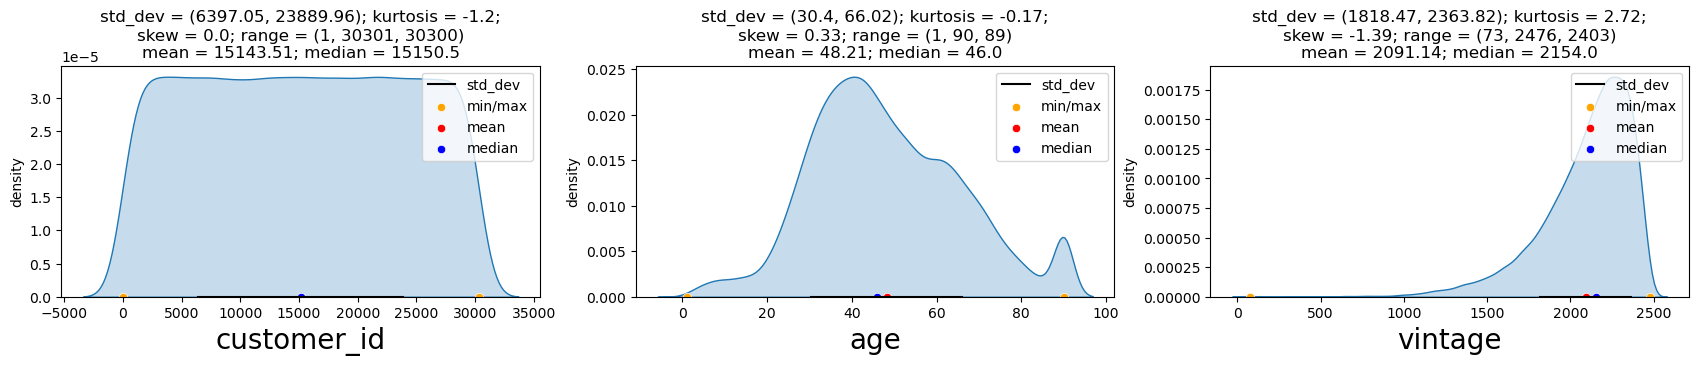

In [98]:
UVA_numeric(data,customer_details)

**Resumo das Informações do Cliente:**
*    **customer_id**:
     *    Variável é **única para cada cliente, portanto, possui distribuição uniforme**.
     * Esta variável **não contribui com nenhuma informação**.
     * Pode ser eliminada dos dados.

*    **idade**:
    *    Idade mediana = 46
    *    **A maioria dos clientes tem entre 30 e 66 anos**.
    *    Assimetria +0.33: a idade dos clientes está **ligeiramente inclinada para faixas etárias mais jovens**.
    *    **Curtose = -0.17**: Muito pouco provável de ter valores extremos/outliers.
*    **vintage**:
    *    A maioria dos clientes ingressou entre 2100 e 2650 dias a partir do dia de extração dos dados.
    *    **Assimetria = -1.42**: está inclinada para a esquerda, **a variável vintage está significativamente inclinada para associações mais longas dos clientes**.
    *    **Curtose = 2.93**: É muito provável a presença de valores extremos e outliers no vintage.

**Coisas para Investigar Mais Detalhadamente no Futuro:**
*    O grupo de **clientes muito idosos** na variável de idade.


Pilula estatistica

**Skewness (Assimetria)** se refere à medida de assimetria de uma distribuição estatística. Uma distribuição é simétrica quando os valores em torno da média são igualmente distribuídos em ambos os lados. Quando uma distribuição é inclinada para a direita (positivamente inclinada), temos valores extremos maiores do que a média, e a cauda direita é mais longa. Uma inclinação para a esquerda (negativamente inclinada) significa que os valores extremos são menores que a média, e a cauda esquerda é mais longa.

**Kurtosis (Curtose)** indica o pico ou a concentração da distribuição em relação à distribuição normal. Se a kurtosis é alta, a distribuição é mais concentrada no pico e possui caudas mais grossas, o que significa que ela tem mais valores extremos (ou outliers). Uma kurtosis baixa indica uma distribuição mais achatada em relação à distribuição normal, com menos valores extremos.

Essas medidas são úteis para entender a forma e a estrutura de uma distribuição estatística e podem ajudar na identificação de padrões, outliers e na compreensão da natureza dos dados.

#### current_month

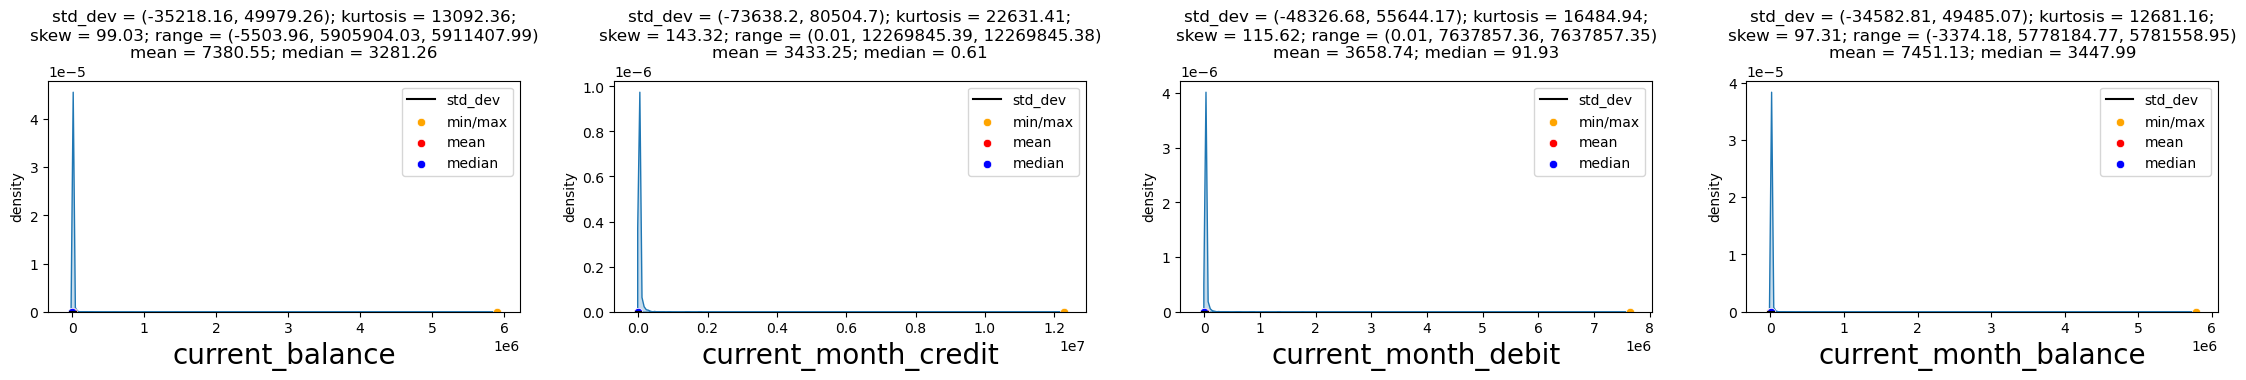

In [99]:
UVA_numeric(data,current_month)

**OBS**

Considerando os valores de kurtosis e skewness para os 4 gráficos, outliers/valores extremos são evidentes.


**Necessidade de Remover Outliers para Visualizar Esses Gráficos**

In [100]:
# Fator de desvio padrão
factor = 3

# copiando o mês atual
cm_data = data[current_month]

# filtrando usando desvio padrão (não considerando observações > 3 * desvio padrão)
cm_data = cm_data[cm_data['current_balance'] < factor*cm_data['current_balance'].std()]
cm_data = cm_data[cm_data['current_month_credit'] < factor*cm_data['current_month_credit'].std()]
cm_data = cm_data[cm_data['current_month_debit'] < factor*cm_data['current_month_debit'].std()]
cm_data = cm_data[cm_data['current_month_balance'] < factor*cm_data['current_month_balance'].std()]

# verificando quantos pontos foram removidos
len(data), len(cm_data)


(28382, 27113)

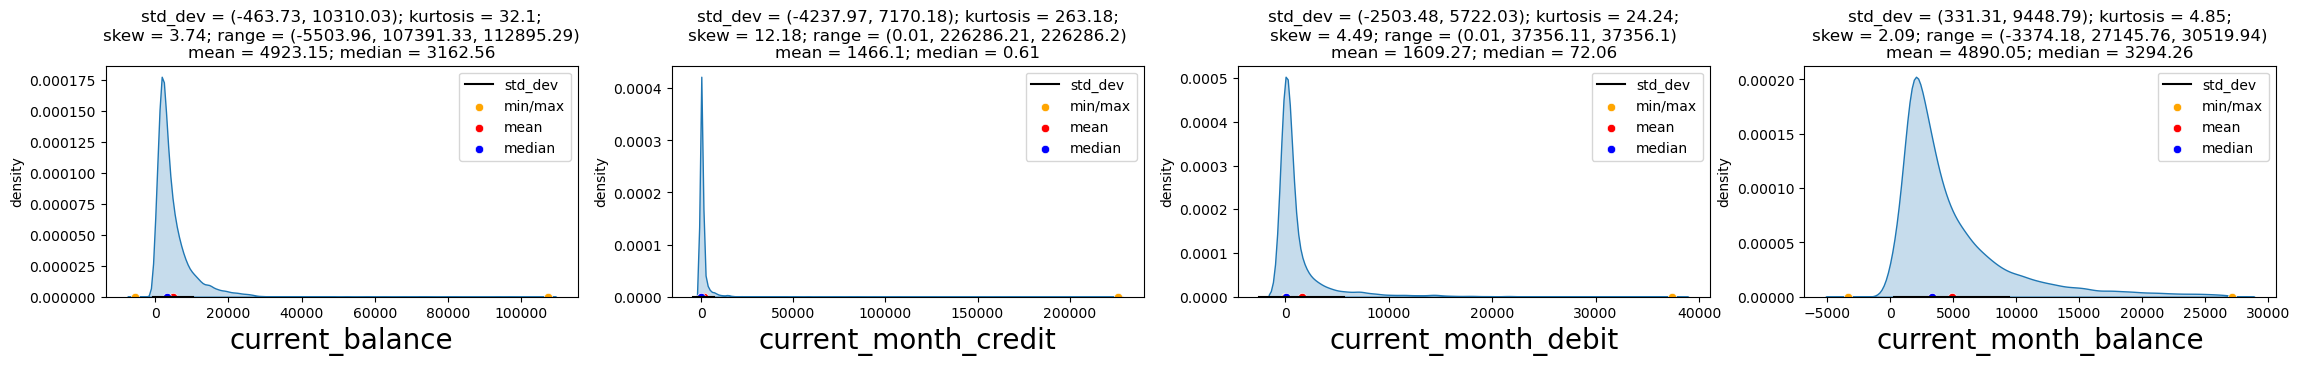

In [101]:
UVA_numeric(cm_data,current_month)

**Resumo do Mês Atual**
* Após a remoção de valores extremos/outliers, os gráficos ainda estão muito inclinados.

**Coisas para Investigar Mais a Fundo**
1. **Existe algum traço/comportamento comum entre os clientes que estão realizando transações de crédito/débito em alto volume?**
2. **Clientes que realizam um alto volume de transações, eles fazem isso todos os meses?**


#### previous_month

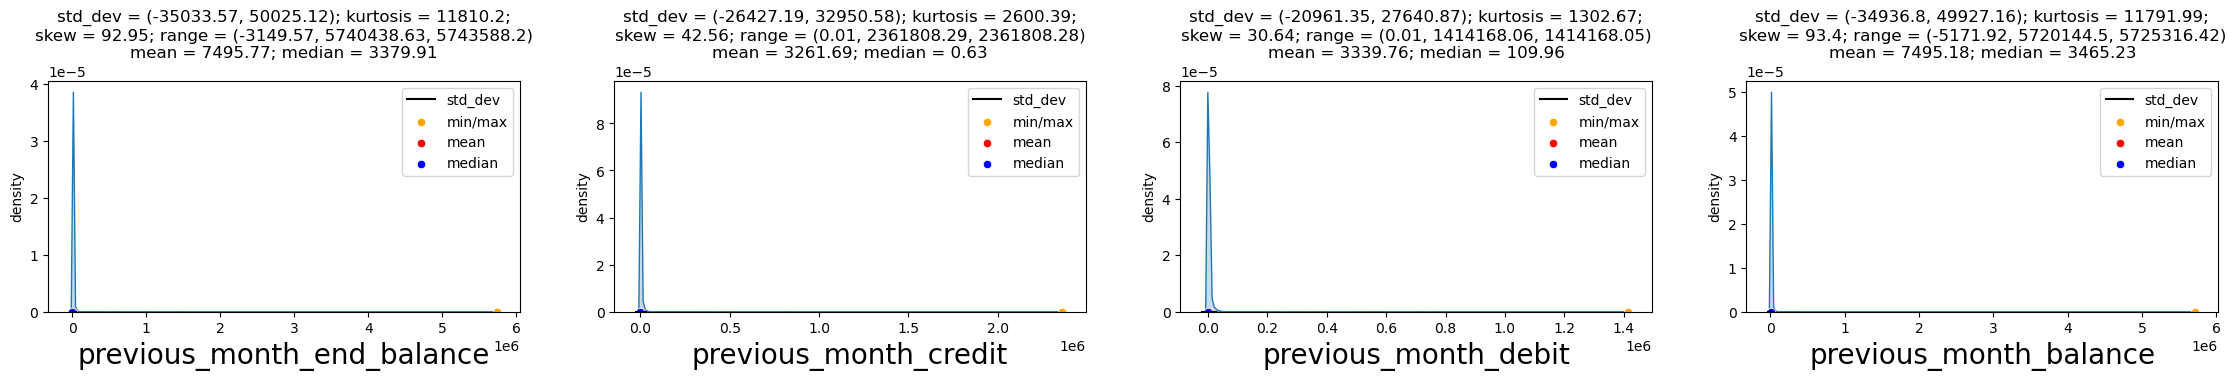

In [102]:
UVA_numeric(data,previous_month)

**Resumo do Mês Anterior**
* Isso se parece muito com o mês atual. A maioria dos clientes realiza transações de baixo valor.


#### previous_quarters

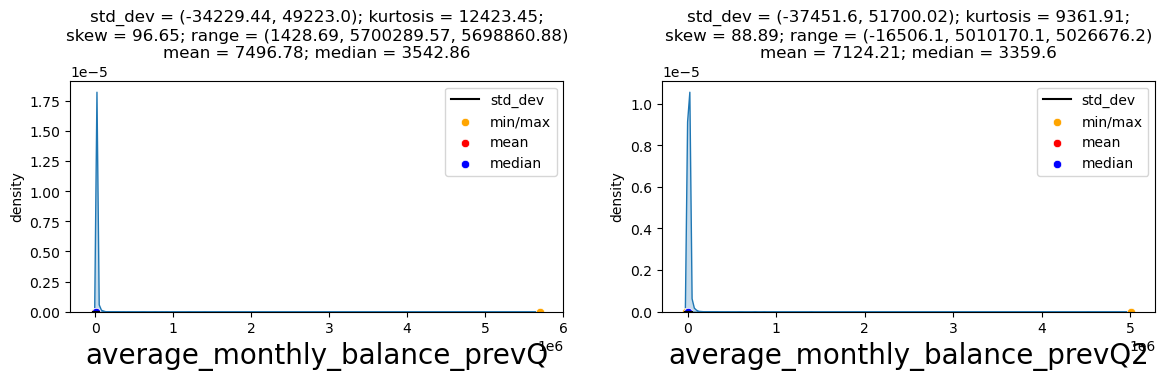

In [103]:
UVA_numeric(data,previous_quarters)

**Resumo**
A tendência geral ainda segue, é crucial descobrir se existe algum traço comum entre os clientes que realizam um alto volume de transações.

#### transaction_date

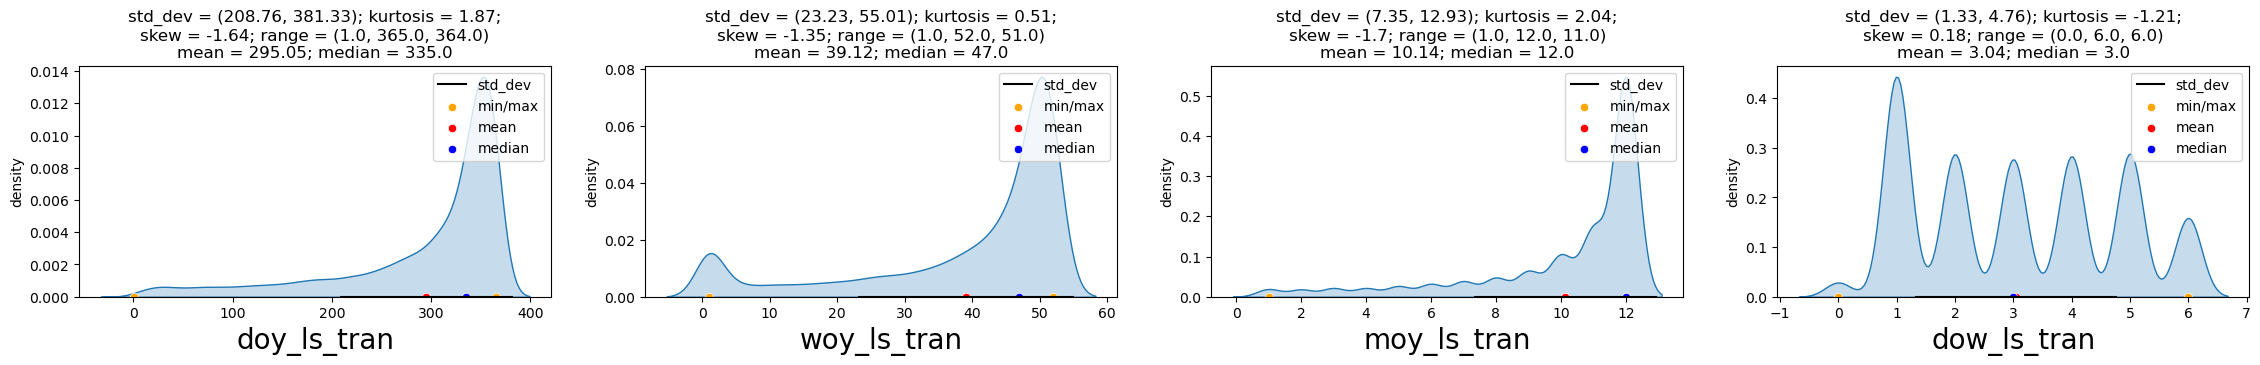

In [104]:
UVA_numeric(data,transaction_date)

**Resumo**
*    **Dia_do_Ano**:
    *    A maioria das últimas transações foi feita nos últimos 60 dias da extração dos dados.
    *    Existem transações que foram feitas também há um ano.

*   **Semana_do_Ano e Mês_do_Ano**: essas variáveis validam as descobertas do **dia_do_ano**.
*    **Dia_da_Semana**: Terças-feiras são frequentemente o dia preferido em relação aos outros.

**Coisas para Investigar Mais Detalhadamente**
*    **Clientes cuja última transação foi há 6 meses, todos cancelaram?**


### Variáveis Categóricas

In [105]:
data.select_dtypes(exclude=['int64','float64','Int64']).dtypes

gender                  category
occupation              category
city                    category
customer_nw_category    category
branch_code             category
churn                   category
dtype: object

#### **Agrupando Variáveis**

* **customer_info**: gênero, ocupação, categoria_patrimônio_cliente
* **account_info**: cidade, código_filial
* **churn**


In [106]:
# Função personalizada para facilitar a visualização de Variáveis Categóricas

def UVA_category(data, var_group):

  '''
  Univariada_Análise_categórica
  pega um grupo de variáveis (categoria) e plota/imprime todos os value_counts e barplot
  '''
  # figure_size
  size = len(var_group)
  plt.figure(figsize = (7*size,5), dpi = 100)

  # para todas as variaveis
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

  # Plotando a variável com todas as informações
    plt.subplot(1,size,j+1)
    sns.barplot(x=norm_count.values, y=norm_count.index, order=norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 22)
    plt.ylabel('{}'.format(i), fontsize = 22)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

#### customer_info

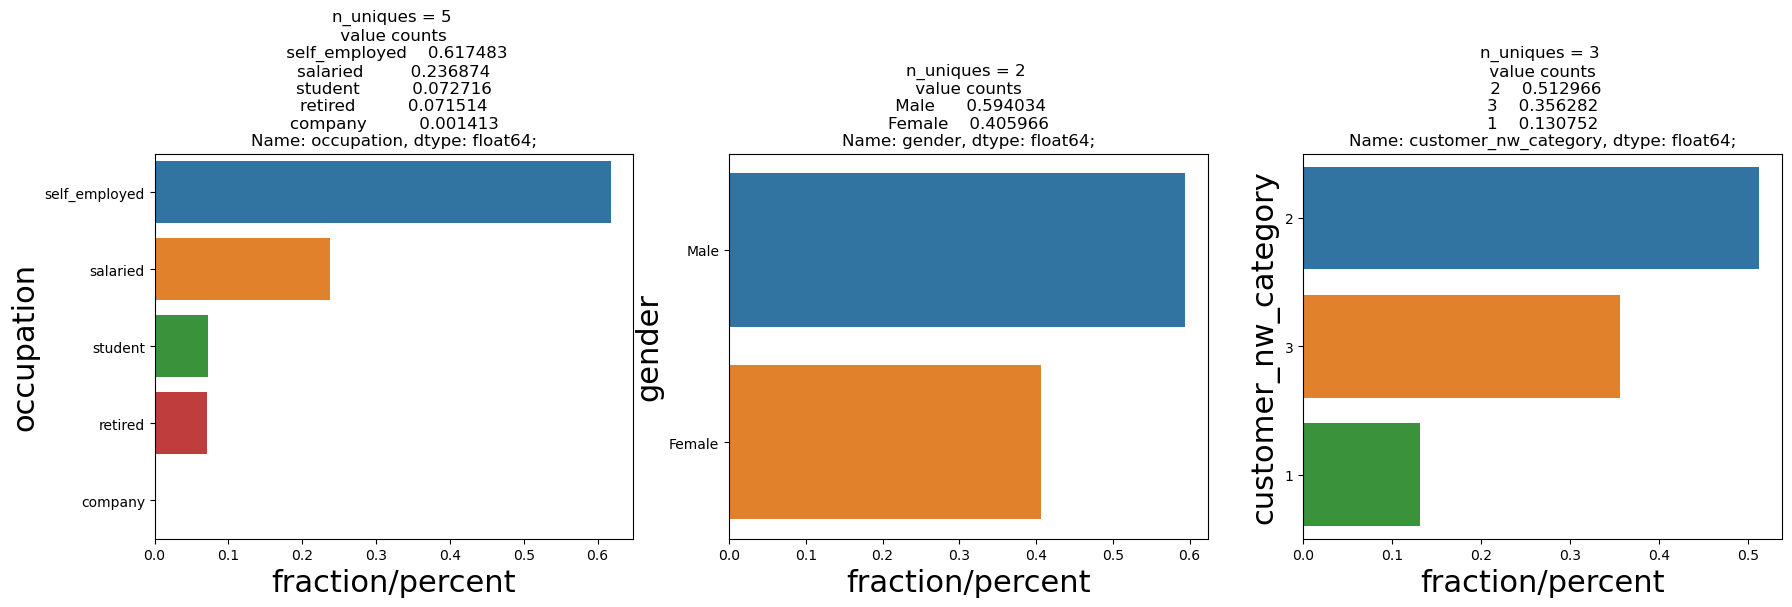

In [107]:
UVA_category(data, ['occupation', 'gender', 'customer_nw_category'])

**Resumo**
* Ocupação:
  * A maioria das pessoas é autônoma.
  * Existem extremamente poucas Contas de Empresa. Pode explicar valores extremos em crédito/débito.

* Gênero:
  * Contas masculinas são 1,5 vezes mais do que as Contas Femininas.

* Categoria_patrimônio_cliente:
  * Metade de todas as contas pertencem à 3ª categoria de patrimônio líquido.
  * Menos de 15% pertencem à categoria de maior patrimônio líquido.

**Coisas para investigar mais a fundo:**
* Possibilidade: Contas de empresa são a razão por trás das transações atípicas.
* Possibilidade: clientes pertencentes à categoria de patrimônio líquido mais alta podem explicar a assimetria das transações.


#### account_info

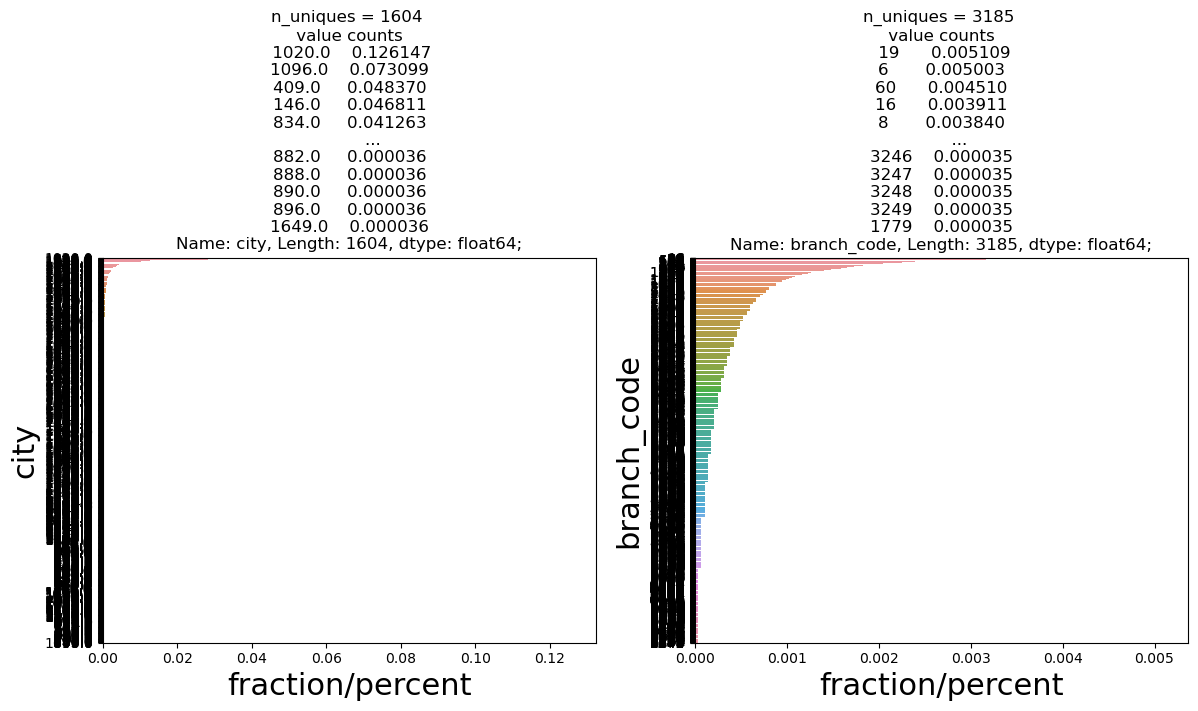

In [108]:
UVA_category(data, ['city', 'branch_code'])

(0.0, 0.02)

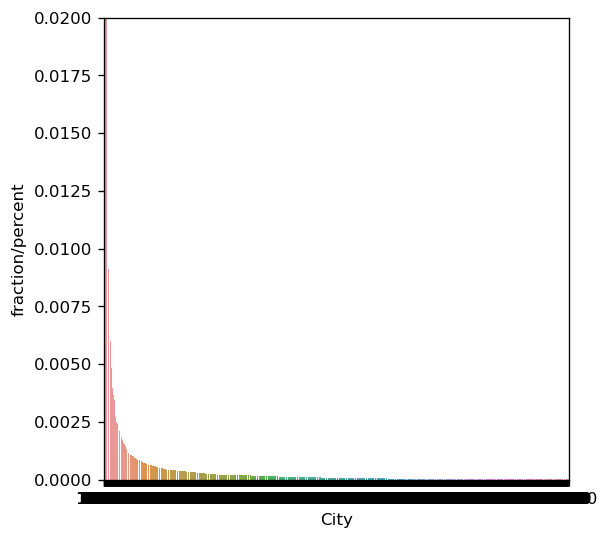

In [109]:
#Plotando "city"
plt.figure(figsize = (5,5), dpi = 120)
city_count = data['city'].value_counts(normalize=True)
sns.barplot(x=city_count.index, y=city_count, order=city_count.index)
plt.xlabel('City')
plt.ylabel('fraction/percent')
plt.ylim(0,0.02)

Text(0, 0.5, 'fraction/percent')

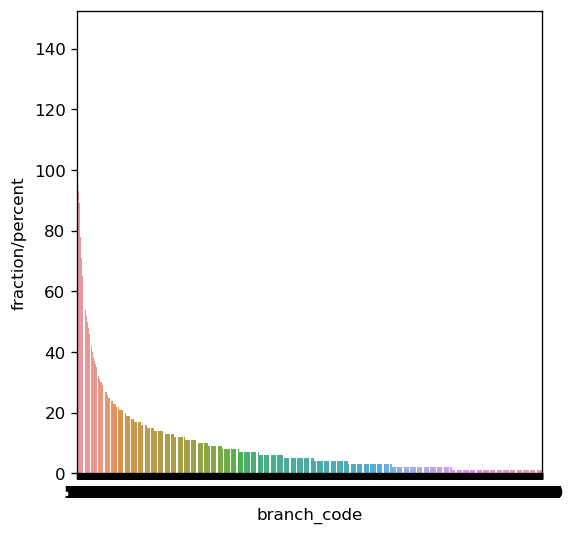

In [110]:
#Plotando "branch_code"
plt.figure(figsize = (5,5), dpi = 120)
branch_count = data['branch_code'].value_counts()
sns.barplot(x=branch_count.index, y=branch_count, order=branch_count.index)
plt.xlabel('branch_code')
plt.ylabel('fraction/percent')
#plt.ylim(0,0.02)

**Resumo**
Para ambas as variáveis "cidade" e "código_da_agência", existem muitas categorias. Há uma clara relação indicando que algumas agências e cidades são mais populares entre os clientes e essa tendência diminui rapidamente.

**Coisas para Investigar Mais Detalhadamente:**
* Cidades e códigos de agência populares podem explicar a assimetria e os valores atípicos das variáveis de crédito/débito.
* Possibilidade de que cidades e códigos de agência com muito poucas contas possam levar à churn.


#### churn

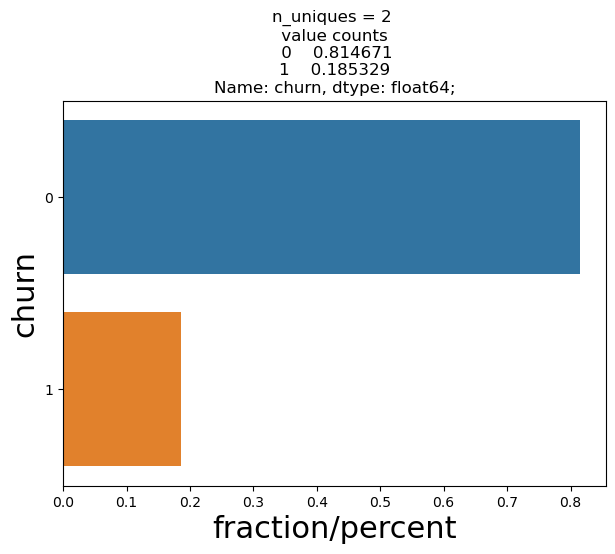

In [111]:
UVA_category(data, ['churn'])

**Resumo**
* O número de pessoas que cancelaram a assinatura é 1/4 do número de pessoas que não cancelaram na base de dados fornecida.


### Valores Ausentes

In [112]:
# encontrando o número de valores ausentes em cada variável
data.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
doy_ls_tran                       3223
woy_ls_tran                       3223
moy_ls_tran                       3223
dow_ls_tran                       3223
dtype: int64

**Coisas para investigar mais a fundo:**
  * Gênero: Os clientes com valores de gênero ausentes têm algum comportamento comum em -
  * churn: os valores ausentes têm alguma relação com o churn?

* Dependentes:
     * Valores ausentes podem ser semelhantes a zero dependentes
     * churn: os valores ausentes têm alguma relação com o churn?

* Ocupação:
     * Os valores ausentes têm comportamento semelhante a alguma outra ocupação
     * eles têm alguma relação com o churn?
    
* Cidade:
  * As cidades respectivas podem ser encontradas usando o código da filial

* Última transação:
  * Verificar as atividades do mês anterior, mês atual e do trimestre anterior pode fornecer insights sobre a última transação.

* Para quase todas as situações acima:

  * vintage: pode estar registrando erros do mesmo período de entrada
  * código da filial: pode estar registrando erros de determinada filial


### Análise Univariada: Outliers

**Suspeitamos de outliers nos grupos de variáveis current_month e previous_month. Vamos verificar isso usando box plots.**

In [113]:
# Função personalizada para análise fácil de outliers

def UVA_outlier(data, var_group, include_outlier = True):
  '''
  nivariada_Analysis_outlier:
  pega um grupo de variáveis (INTEGER e FLOAT) e plota/imprime boplot e descritivos
  Executa um loop: calcula todos os descritivos da i(ésima) variável e plota
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  
 # Loop para cada variável
  for j,i in enumerate(var_group):
    
    # calculando descritivos da variável
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = quant25-(1.5*IQR)
    whis_high = quant75+(1.5*IQR)

    # calc numero of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      #Plotando a variável com todas as informações
      plt.subplot(1,size,j+1)
      sns.boxplot(data[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))
      
    else:
      # substituindo outliers por máximo/mínimo
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1
      
      # plotando sem outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(data2[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

#### current_month and previous_month

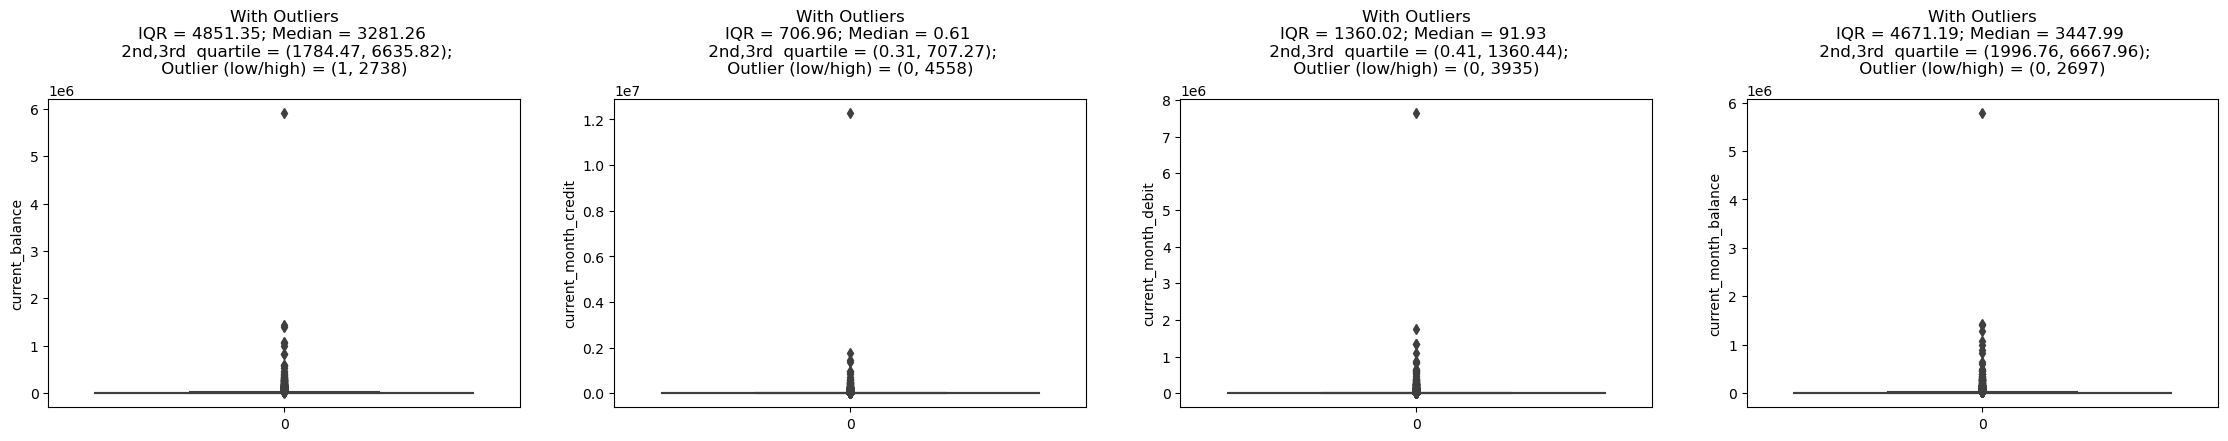

In [114]:
UVA_outlier(data, current_month,)

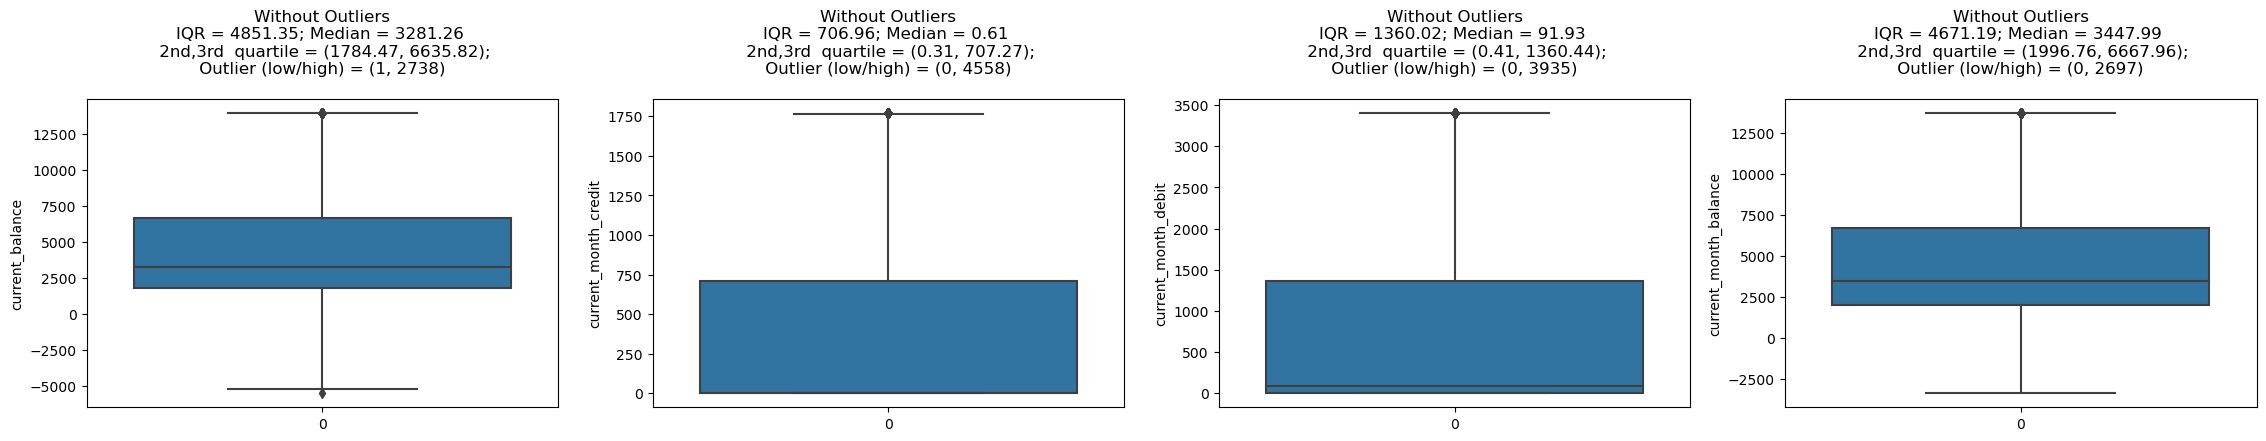

In [115]:
UVA_outlier(data, current_month, include_outlier=False)

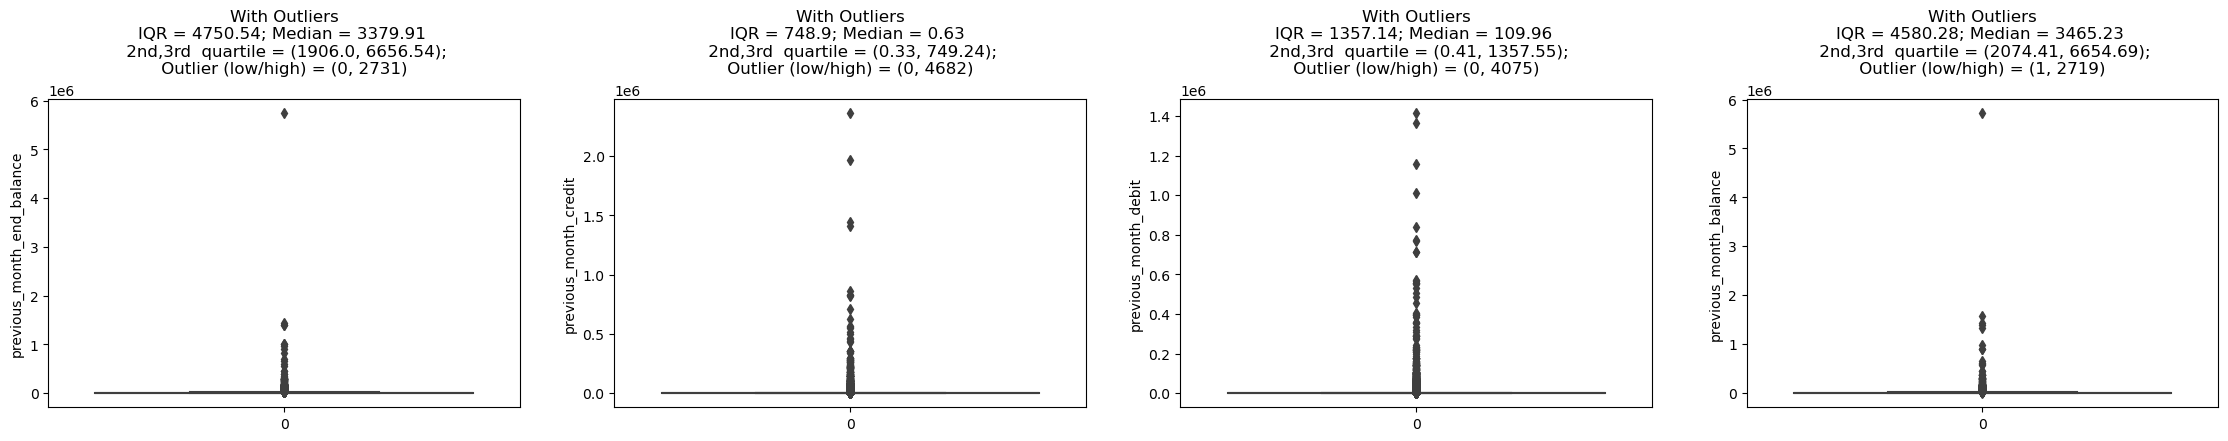

In [116]:
UVA_outlier(data, previous_month)

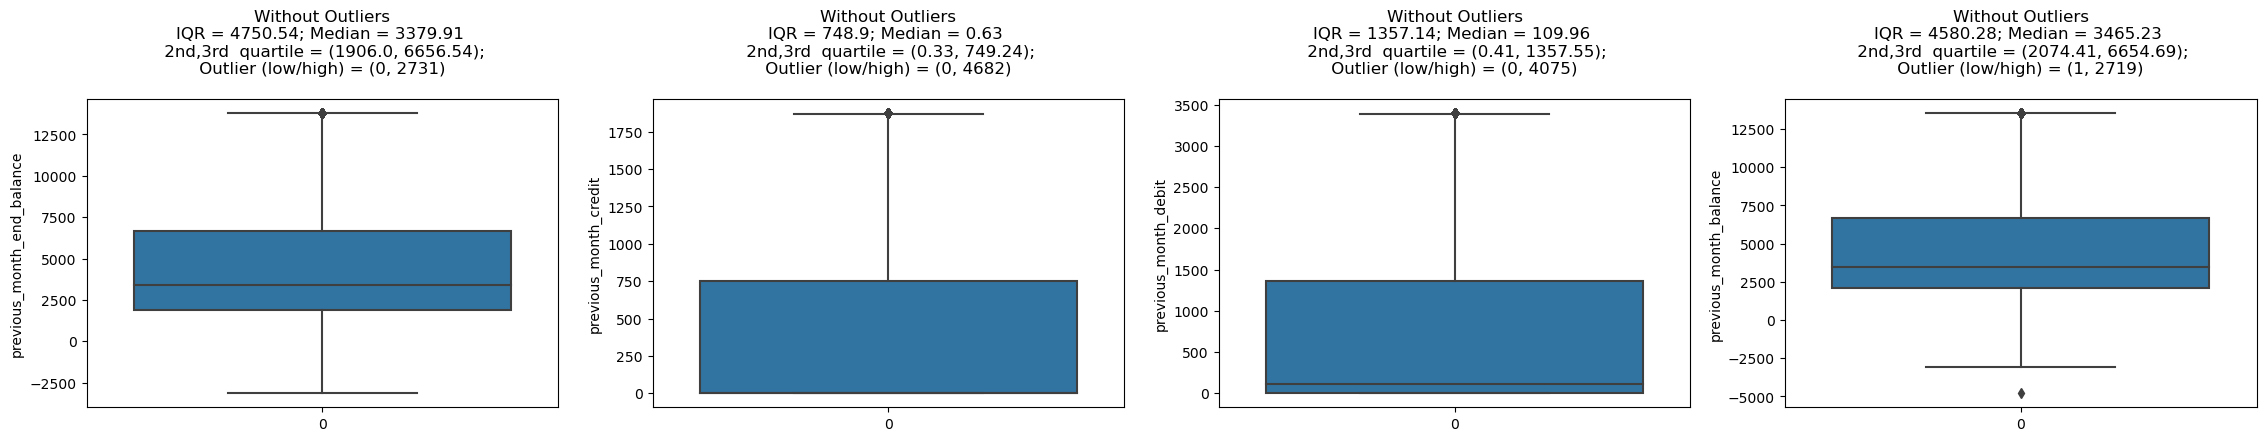

In [117]:
UVA_outlier(data, previous_month, include_outlier=False)

**Resumo**
* Se observarmos os gráficos correspondentes nos resultados acima, parece haver uma forte relação entre os gráficos correspondentes das variáveis mês_anterior e mês_atual.

* Os valores discrepantes são significativos em número e muito semelhantes em número entre os gráficos correspondentes. O que indica algum comportamento inerente não descoberto de Outliers.

#### previous quarters

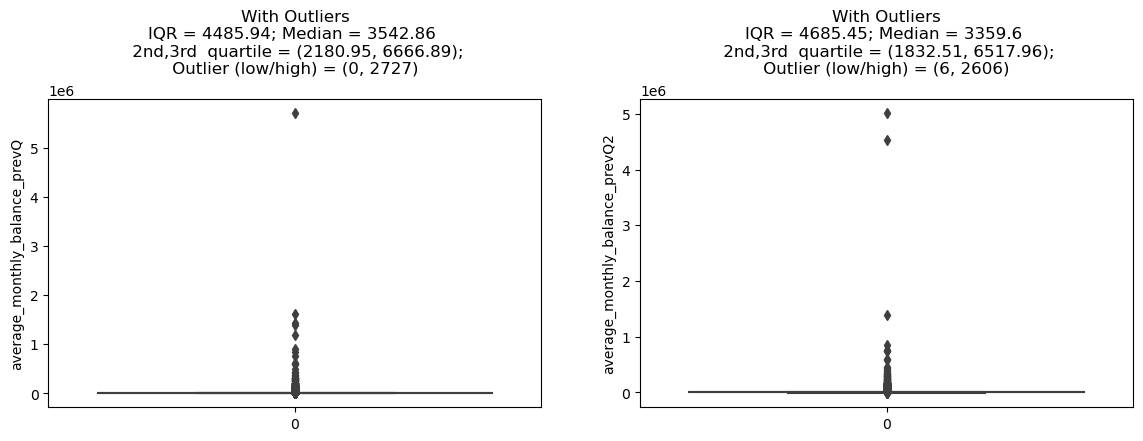

In [118]:
UVA_outlier(data,previous_quarters)

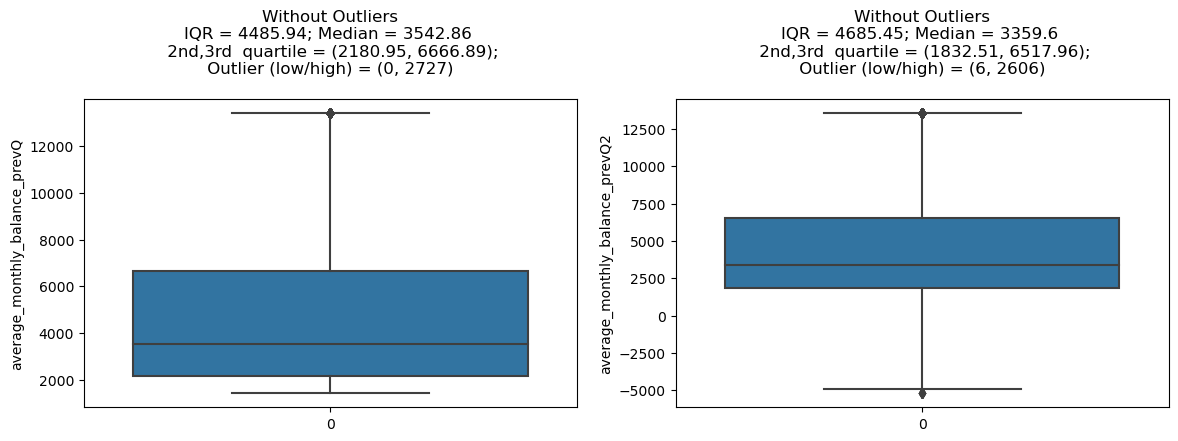

In [119]:
UVA_outlier(data,previous_quarters, include_outlier = False)

Resumo
* Os valores discrepantes dos dois trimestres anteriores são muito semelhantes, mas em número significativamente grande.

#### Direções de investigação da análise univariada
1. A variável customer_id pode ser eliminada.
2. Existe algum traço/relação comum entre os clientes que realizam altas transações de crédito/débito?
    * customer_nw_category pode explicar isso.
    * Ocupação = A empresa pode explicá-los
    * cidades populares podem explicar isso
4. Clientes cuja última transação foi há 6 meses, todos eles abandonaram?
5. Possibilidade de que cidades e códigos de agências com muito poucas contas possam causar rotatividade.


### Numérica-Numérica

In [120]:
# isolando tipos de dados numéricos
numerical = data.select_dtypes(include=['int64','float64','Int64'])[:]
numerical.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
dependents                          Int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
doy_ls_tran                       float64
woy_ls_tran                       float64
moy_ls_tran                       float64
dow_ls_tran                       float64
dtype: object

#### Correlation Matrix

In [121]:
# calculando correlação
correlation = numerical.dropna().corr()
correlation

,customer_id,vintage,age,dependents,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,doy_ls_tran,woy_ls_tran,moy_ls_tran,dow_ls_tran
customer_id,1.000000,-0.011288,0.001397,-0.009737,0.014989,0.012414,0.011372,0.008060,0.004223,-0.004819,0.004870,-0.005906,0.012085,0.011025,-0.006114,0.011344,-0.005374,0.009665
vintage,-0.011288,1.000000,0.003170,0.005109,-0.007223,-0.008001,-0.010858,-0.003824,-0.004821,-0.000410,-0.004899,-0.007777,-0.008703,-0.010439,-0.000680,-0.010040,-0.001359,-0.009683
age,0.001397,0.003170,1.000000,-0.003809,0.058925,0.062775,0.070903,0.081361,0.023921,0.027678,0.025366,0.027717,0.063120,0.067712,0.010754,0.000501,0.011970,-0.020895
dependents,-0.009737,0.005109,-0.003809,1.000000,-0.004554,-0.000826,0.000121,0.002584,0.002188,0.022772,0.006784,0.029073,-0.001859,0.000241,0.079740,0.034460,0.077978,-0.001702
current_balance,0.014989,-0.007223,0.058925,-0.004554,1.000000,0.809257,0.857204,0.584156,0.053329,0.101495,0.075149,0.151771,0.940234,0.812295,0.035242,-0.008980,0.033127,-0.000315
previous_month_end_balance,0.012414,-0.008001,0.062775,-0.000826,0.809257,1.000000,0.908053,0.661439,0.051080,0.195149,0.100379,0.192376,0.910206,0.912269,0.024130,0.000946,0.023485,0.002033
average_monthly_balance_prevQ,0.011372,-0.010858,0.070903,0.000121,0.857204,0.908053,1.000000,0.731953,0.051294,0.138967,0.091491,0.187226,0.920943,0.983797,0.021103,-0.000577,0.020949,0.000647
average_monthly_balance_prevQ2,0.008060,-0.003824,0.081361,0.002584,0.584156,0.661439,0.731953,1.000000,0.085542,0.127557,0.098455,0.162203,0.642531,0.701780,0.010306,-0.012720,0.009123,-0.002463
current_month_credit,0.004223,-0.004821,0.023921,0.002188,0.053329,0.051080,0.051294,0.085542,1.000000,0.165102,0.941455,0.116125,0.055339,0.055020,0.031828,0.008664,0.030267,0.000752
previous_month_credit,-0.004819,-0.000410,0.027678,0.022772,0.101495,0.195149,0.138967,0.127557,0.165102,1.000000,0.160198,0.749628,0.141613,0.178147,0.070141,0.016762,0.066691,-0.006657


#### Mapa de calor

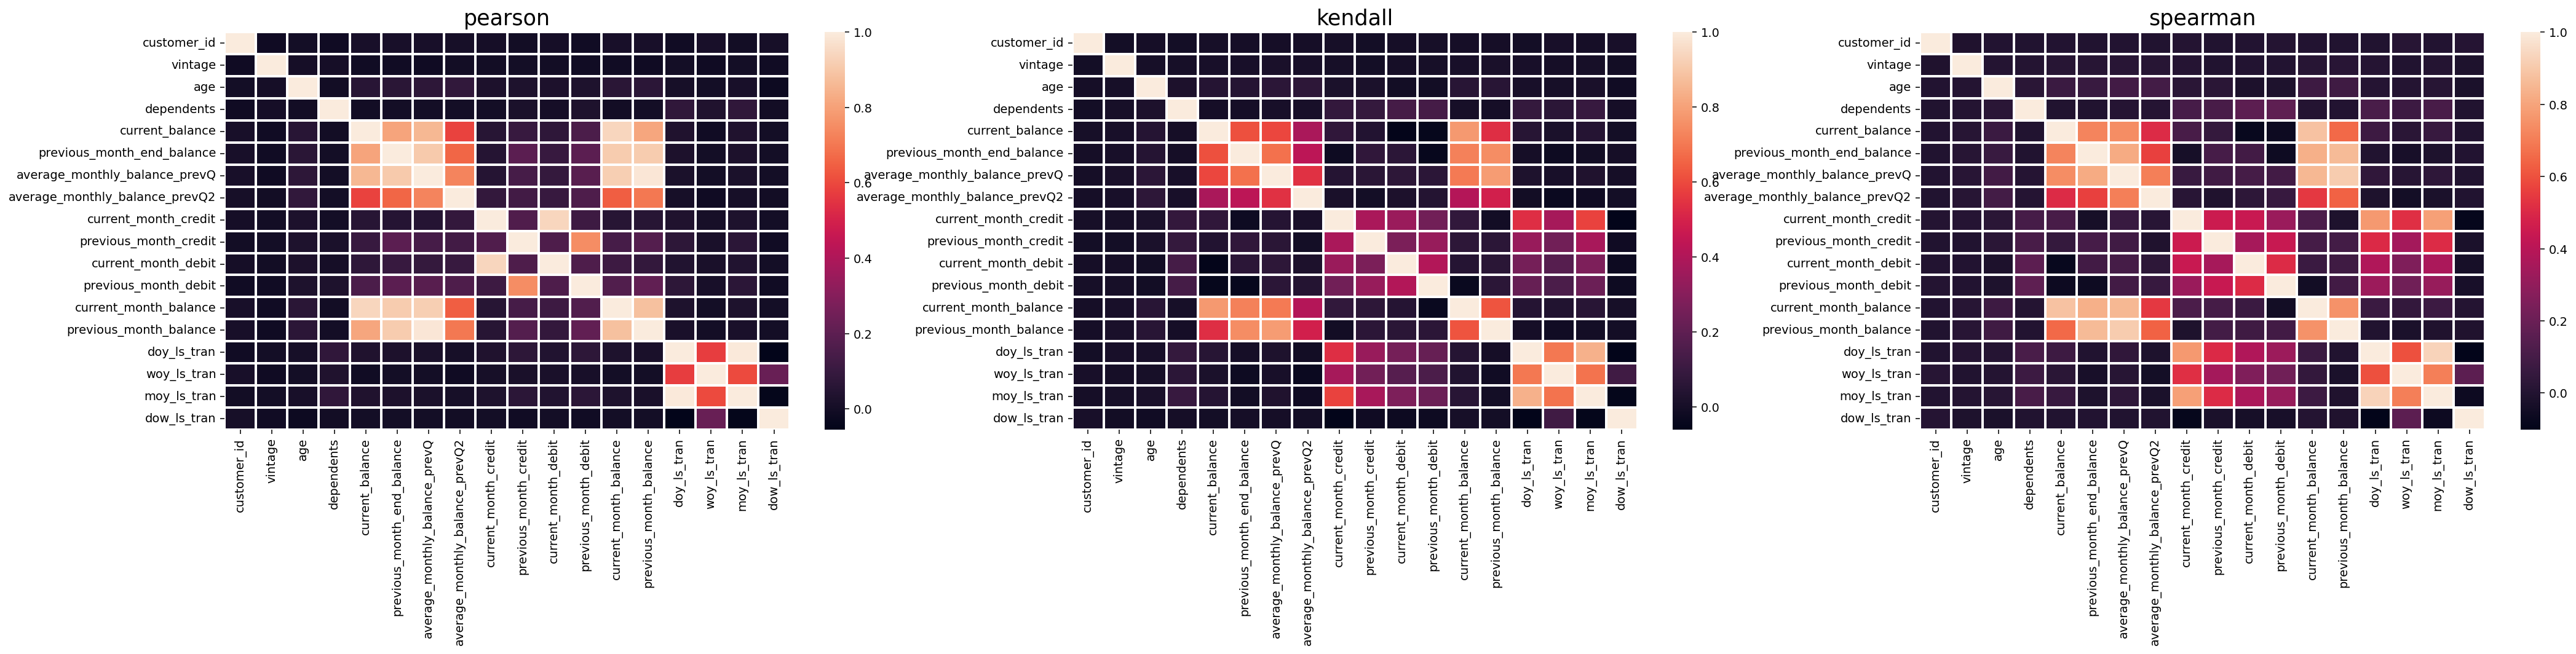

In [122]:
# plotando o mapa de calor usando todos os métodos para todas as variáveis numéricas
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = numerical.dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)



* As correlações de Kendall e Spearman parecem ter um padrão muito semelhante entre si, exceto pela ligeira variação na magnitude da correlação.
* Muitas variáveis com correlação insignificante.
* A principal correlação reside entre as variáveis de transação e as variáveis de saldo.

Pilula estatistica

- **Correlação de Spearman:** Essa correlação avalia a relação monotônica entre duas variáveis, ou seja, se, quando uma variável aumenta, a outra também aumenta (ou diminui). Ela é baseada na comparação das classificações ou ordens das observações entre as variáveis. O coeficiente de correlação de Spearman varia de -1 a 1, onde 1 indica uma correlação perfeitamente crescente, -1 indica uma correlação perfeitamente decrescente e 0 indica nenhuma correlação.

- **Correlação de Kendall:** Similar à de Spearman, a correlação de Kendall também mede a relação entre variáveis ordenadas. Ela avalia a concordância ou discordância das classificações entre as duas variáveis, ignorando a distância real entre os valores. O coeficiente de correlação de Kendall também varia de -1 a 1, com interpretação semelhante à de Spearman.

Ambos os métodos são úteis quando os dados não atendem às premissas de normalidade ou quando os dados são ordinais. Eles são robustos em relação a outliers, mas podem ser menos sensíveis a variações extremas em comparação com as correlações lineares como a de Pearson.

Esses métodos são aplicados quando se deseja entender se há uma relação monotônica (crescente ou decrescente) entre duas variáveis, mas não se está interessado na intensidade exata dessa relação como na correlação de Pearson, que mede correlações lineares.

In [123]:
# extraindo informações de transações dos meses atuais e anteriores
var = []
var.extend(previous_month)
var.extend(current_month)
var.extend(previous_quarters)

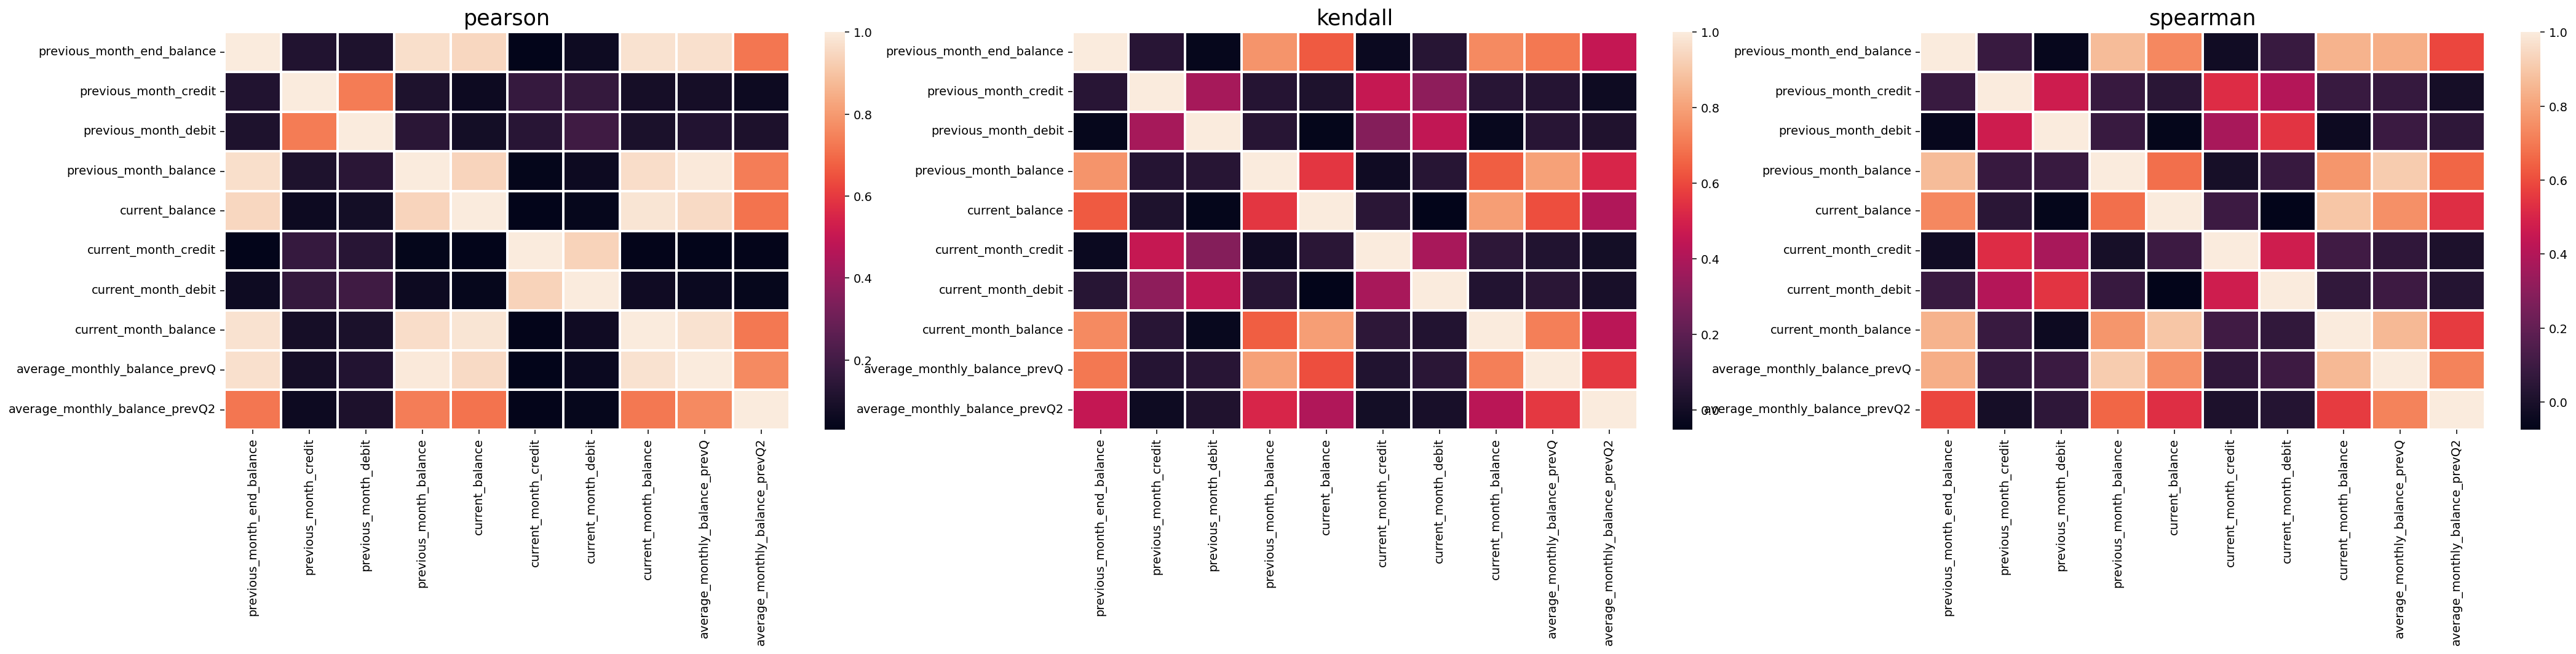

In [124]:
# plotando o mapa de calor usando todos os métodos para todas as variáveis de transação
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = numerical[var].dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)

**Inferências:**


1. Variáveis de transação como crédito/débito têm uma forte correlação entre si.
2. As variáveis de equilíbrio apresentam forte correlação entre si.
3. Variáveis de transação como crédito/débito têm correlação insignificante ou nenhuma correlação com as variáveis de Saldo.



### Análise multivariada

#### Pivot Table

Estamos usando a tabela dinâmica para cumprir o objetivo de identificar o perfil de clientes churning usando vários recursos categóricos.
Primeiro, vamos usar as categorias Gênero, Ocupação e Patrimônio Líquido do Cliente e obter insights da Tabela Dinâmica

#### Gender, Occupation, Customer Net worth category COM Churn

In [125]:
data['gender'] = data['gender'].astype('object')
data['occupation'] = data['occupation'].astype('object')
data['customer_nw_category'] = data['customer_nw_category'].astype('object')
data['churn'] = data['churn'].astype('int')
data['city'] = data['city'].astype('float')
data['branch_code'] = data['branch_code'].astype('float')

* Tipo de dados adequado para criação de tabela dinâmica na versão Pandas (tipo de dados categórico não é compatível)

In [126]:
data.pivot_table('churn', ['gender', 'occupation'], 'customer_nw_category', aggfunc='mean')*100

customer_nw_category           1          2          3
gender occupation                                     
Female company        100.000000   0.000000  66.666667
       retired         20.689655  11.219512  13.492063
       salaried        18.545455  14.849188  17.689016
       self_employed   18.111588  18.197035  18.920916
       student         10.404624  14.442413  15.034965
Male   company          0.000000   0.000000   0.000000
       retired         18.497110  14.251781  16.316640
       salaried        17.557252  16.410469  18.468702
       self_employed   22.832370  20.424978  21.465808
       student         16.969697  17.210145  18.208955

* __O maior número de clientes que abandonam__ são aqueles __Clientes do sexo masculino__ que se enquadram na __2 categoria de patrimônio líquido__ e pertencem à profissão de __Autônomo__
* Em termos de proporção para a categoria de patrimônio líquido 1, aproximadamente 22% dos __clientes do sexo masculino__ que pertencem à profissão de __autônomo__ estão mudando
* Em termos de proporção para a categoria de patrimônio líquido 2, 20% dos __clientes do sexo masculino__ que pertencem à profissão de __autônomo__ estão mudando
* Para a categoria de patrimônio líquido 3, aproximadamente 21% dos __clientes do sexo masculino__ que pertencem à profissão de __autônomo__ estão mudando

* Em todos os casos da categoria de patrimônio líquido do cliente, __clientes autônomos do sexo masculino__ têm maior probabilidade de abandonar

* Seria interessante ir mais fundo e descobrir se os clientes __"homens autônomos"__ estão mais agitados

#### Gender, Age, Occupation COM Churning Status

Vamos usar uma variável contínua, Idade, e duas variáveis categóricas, Gênero e Ocupação, para obter insights relacionados a perfis de clientes que estão mudando.
Teremos que converter variável contínua em variável categórica para usar a Tabela Dinâmica com eficiência. Aqui estamos dividindo a idade em três intervalos

In [127]:
age = pd.cut(data['age'], [0, 25, 50, 100])
data.pivot_table('churn', ['gender', age], 'occupation', aggfunc='sum')

occupation        company  retired  salaried  self_employed  student
gender age                                                          
Female (0, 25]          0        0         7             27      102
       (25, 50]         2        0       226            852       38
       (50, 100]        1       52        70            605        0
Male   (0, 25]          0        0        17             74      137
       (25, 50]         0        2       563           1107       47
       (50, 100]        0      251       264            698        0

In [128]:
age = pd.cut(data['age'], [0, 25, 50, 100])
data.pivot_table('churn', ['gender', age], 'occupation', aggfunc='mean')*100

occupation        company    retired   salaried  self_employed    student
gender age                                                               
Female (0, 25]        NaN        NaN  15.909091      21.774194  13.421053
       (25, 50]      50.0   0.000000  16.096866      19.163293  15.510204
       (50, 100]     50.0  13.541667  17.948718      17.370083   0.000000
Male   (0, 25]        0.0        NaN  20.987654      30.327869  16.545894
       (25, 50]       0.0  14.285714  17.349769      21.886121  21.076233
       (50, 100]      0.0  15.493827  17.165150      19.340538   0.000000

* Criamos três categorias para a variável idade, dividindo a idade em 3 grupos: 0-25, 25-50 e 50-100
* O maior número de clientes vem da __categoria masculina__ que pertence à faixa etária de __(25,50)__ e é profissionalmente __trabalhador autônomo__
* A maior proporção de clientes vem da __categoria masculina__, que pertence à faixa etária de __(0,25)__ e é profissionalmente __trabalhador autônomo__
* Aqui também __clientes homens autônomos__ estão mudando mais do que qualquer outra combinação de categorias



#### Gender,Age,Occupation and Current Balance COM Churning Status

Vamos nos aprofundar usando duas variáveis contínuas Idade e Saldo Atual e duas variáveis categóricas Gênero e Ocupação e tentar descobrir os insights relacionados à mudança no perfil dos clientes

In [129]:
balance = pd.qcut(data['current_balance'], 3)
data.pivot_table('churn', ['gender', age], [balance, 'occupation'], aggfunc='sum')

current_balance  (-5503.961, 2202.177]                                         \
occupation                     company retired salaried self_employed student   
gender age                                                                      
Female (0, 25]                       0       0        5            22      64   
       (25, 50]                      1       0      146           522      20   
       (50, 100]                     1      34       45           353       0   
Male   (0, 25]                       0       0       12            52      95   
       (25, 50]                      0       0      328           694      30   
       (50, 100]                     0     156      150           364       0   

current_balance  (2202.177, 5114.317]                                         \
occupation                    company retired salaried self_employed student   
gender age                                                                     
Female (0, 25]                      0       0        1             4      21   
       (25, 50]                     1       0       51           171       7   
       (50, 100]                    0       8       14           125       0   
Male   (0, 25]                      0       0        4            12      20   
       (25, 50]                     0       1      129           208      10   
       (50, 100]                    0      39       52           143       0   

current_balance  (5114.317, 5905904.03]                                         
occupation                      company retired salaried self_employed student  
gender age                                                                      
Female (0, 25]                        0       0        1             1      17  
       (25, 50]                       0       0       29           159      11  
       (50, 100]                      0      10       11           127       0  
Male   (0, 25]                        0       0        1            10      22  
       (25, 50]                       0       1      106           205       7  
       (50, 100]                      0      56       62           191       0

In [130]:
balance = pd.qcut(data['current_balance'], 3)
data.pivot_table('churn', ['gender', age], [balance, 'occupation'], aggfunc='mean')*100

current_balance  (-5503.961, 2202.177]                                      \
occupation                     company    retired   salaried self_employed   
gender age                                                                   
Female (0, 25]                     NaN        NaN  26.315789     38.596491   
       (25, 50]                   50.0   0.000000  32.300885     33.677419   
       (50, 100]                 100.0  28.333333  35.156250     30.642361   
Male   (0, 25]                     0.0        NaN  35.294118     52.000000   
       (25, 50]                    0.0   0.000000  33.367243     38.901345   
       (50, 100]                   0.0  29.489603  32.119914     33.060854   

current_balance             (2202.177, 5114.317]                        \
occupation          student              company    retired   salaried   
gender age                                                               
Female (0, 25]    21.262458                  NaN        NaN   5.882353   
       (25, 50]   25.974026                100.0   0.000000   9.826590   
       (50, 100]   0.000000                  NaN   5.633803  11.200000   
Male   (0, 25]    28.189911                  NaN        NaN  14.285714   
       (25, 50]   44.117647                  0.0  16.666667  11.889401   
       (50, 100]        NaN                  0.0   6.927176  10.766046   

current_balance                           (5114.317, 5905904.03]             \
occupation       self_employed    student                company    retired   
gender age                                                                    
Female (0, 25]       10.810811   7.167235                    NaN        NaN   
       (25, 50]      10.891720   6.862745                    0.0        NaN   
       (50, 100]     11.052166        NaN                    0.0   8.196721   
Male   (0, 25]       14.117647   6.493506                    NaN        NaN   
       (25, 50]      13.214740  12.345679                    0.0  20.000000   
       (50, 100]     12.565905        NaN                    0.0  10.606061   

current_balance                                       
occupation         salaried self_employed    student  
gender age                                            
Female (0, 25]    12.500000      3.333333  10.240964  
       (25, 50]    6.697460     11.990950  16.666667  
       (50, 100]   8.029197     10.583333        NaN  
Male   (0, 25]     5.263158     16.949153  12.021858  
       (25, 50]    9.005947     12.058824   9.459459  
       (50, 100]  10.544218     13.941606   0.000000

* O saldo atual é dividido em 3 quantis
* É visível à primeira vista que para __saldo atual baixo__ mais clientes estão mudando
* Para o primeiro quantil do saldo atual, mais de __18%__ (mudança média geral) dos clientes estão mudando e para o segundo e terceiro quantil a porcentagem de clientes que estão mudando é inferior a 18%
* No primeiro quantil do saldo atual, para __profissão autônoma__ à medida que a idade dos clientes aumenta, sua proporção de rotatividade diminui. Isso significa que __Jovens Clientes Autônomos__ são mais propensos a abandonar
* Existe uma lacuna visível na proporção de mulheres independentes que se encontram na faixa etária de (0,25) e de homens independentes que se encontram no mesmo grupo. __Jovens clientes autônomos do sexo masculino__ estão produzindo mais do que jovens clientes autônomos do sexo feminino

#### Box Plot

Agora, para cumprir nosso objetivo de identificar o perfil de clientes com rotatividade, utilizaremos o Box plot agrupado.

In [131]:
def Grouped_Box_Plot(data, cont, cat1, cat2):
    # boxplot
    sns.boxplot(x=cat1, y=cont, hue=cat2, data=data, orient='v')
    plt.title('Boxplot')



#### Age, Occupation, Churn

Estamos usando uma variável contínua Idade e uma variável categórica Ocupação para obter insights relacionados à rotatividade do perfil dos clientes

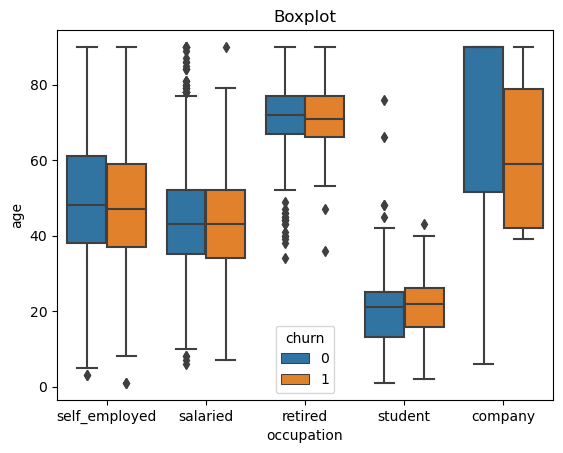

In [132]:
Grouped_Box_Plot(data,'age', 'occupation', 'churn')

Podemos notar aqui que
* Para a profissão __autônomo__, os clientes que abandonam são ligeiramente __mais jovens__ do que os clientes que não abandonam
* Na ocupação de aposentados para clientes que não abandonam, há muitos valores discrepantes que indicam que __os jovens que se aposentam mais cedo não estão abandonando__


#### Vintage, Gender, Churn

Também é importante saber a importância do vintage na rotatividade do perfil dos clientes em termos de gênero
Portanto, não vamos usar Vintage e Gênero para obter insights sobre clientes que estão mudando

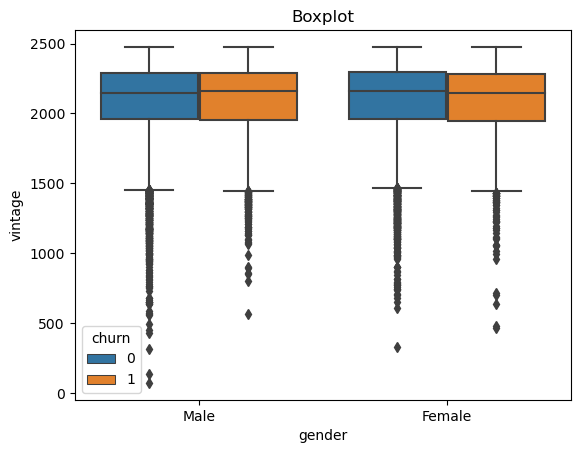

In [133]:
Grouped_Box_Plot(data,'vintage','gender', 'churn')

* Não há __nenhuma diferença visível__ no recurso vintage para clientes que abandonam e não abandonam o gênero

#### Pair Plot

#### Churn versus saldos do mês atual e anterior

Agora, verificaremos a relação de algumas variáveis transacionais junto com o status de rotatividade. Aqui a conversão para log é importante porque temos muitos valores discrepantes e a visualização será difícil para isso.

In [134]:
balance_cols = ['current_balance','previous_month_end_balance',
                'current_month_balance', 'previous_month_balance']
data1 = pd.DataFrame()

for i in balance_cols:
    data1[str('log_')+ i] = np.log(data[i] + 6000)

log_balance_cols = data1.columns

In [135]:
data1['churn'] = data['churn']

Usaremos a brilhante função pairplot da Seaborn, que suporta a exibição do relacionamento entre múltiplas variáveis. Ele exibe o gráfico de dispersão entre um par de recursos e também exibe a distribuição

Aqui incluí o seguinte:
* Registro do saldo atual e saldo final do mês anterior
* Log do saldo médio mensal do mês atual e anterior
* A rotatividade é representada pela cor aqui (laranja - rotatividade, azul - não rotatividade)

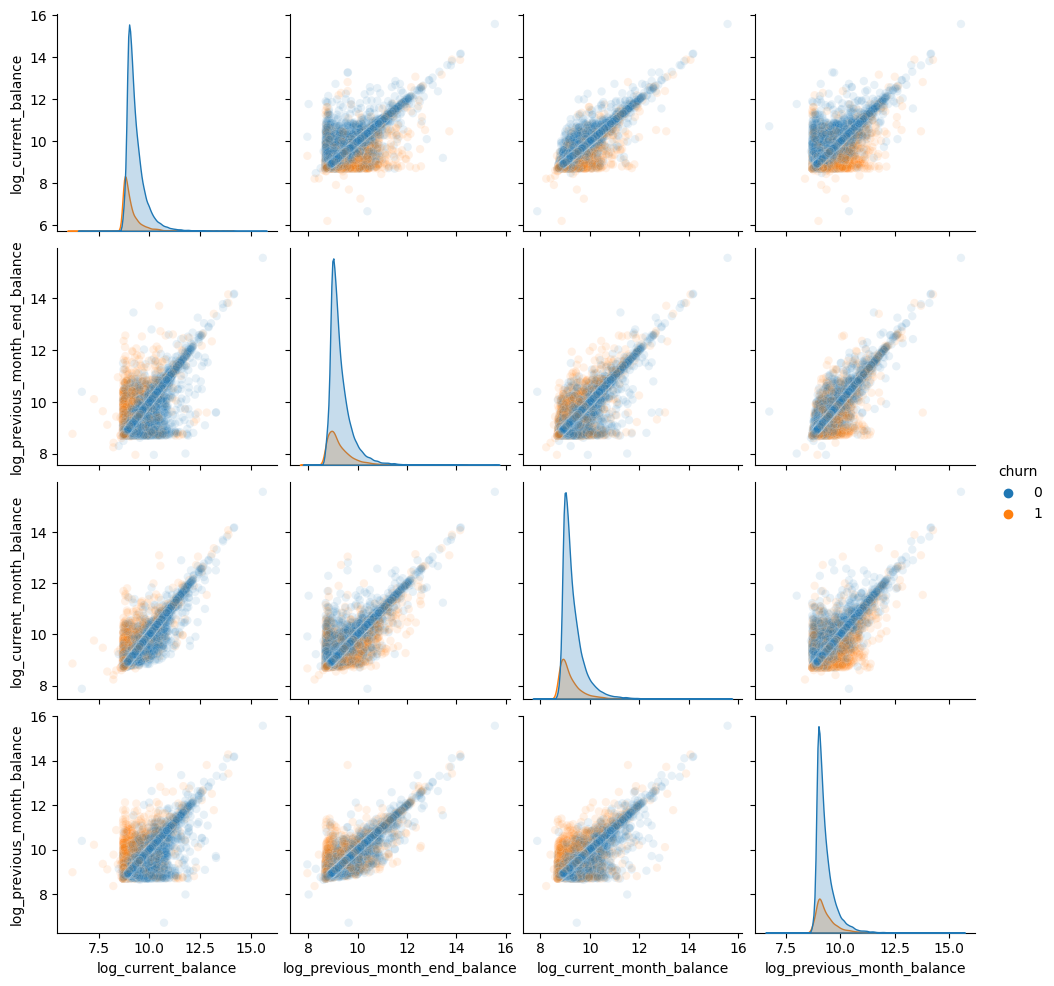

In [136]:
sns.pairplot(data1,vars=log_balance_cols,hue ='churn',plot_kws={'alpha':0.1})
plt.show()

A distribuição desses recursos é semelhante. Podemos tirar as seguintes conclusões disso:
* Existe uma alta correlação entre os saldos do mês anterior e atual, o que é esperado
* A distribuição para churn e não churn é ligeiramente diferente para ambos os casos

#### Crédito e Débito dos meses atuais e anteriores

Os valores totais de crédito e débito do atual e do anterior podem ser incluídos na mesma categoria. Vamos usar novamente o gráfico de pares para verificar distribuições e gráficos de dispersão.

In [137]:
cr_dr_cols = ['current_month_credit','previous_month_credit', 
              'current_month_debit', 'previous_month_debit']
data1 = pd.DataFrame()

for i in cr_dr_cols:
    data1[str('log_')+ i] = np.log(data[i])

log_dr_cr_cols = data1.columns

In [138]:
data1['churn'] = data['churn']

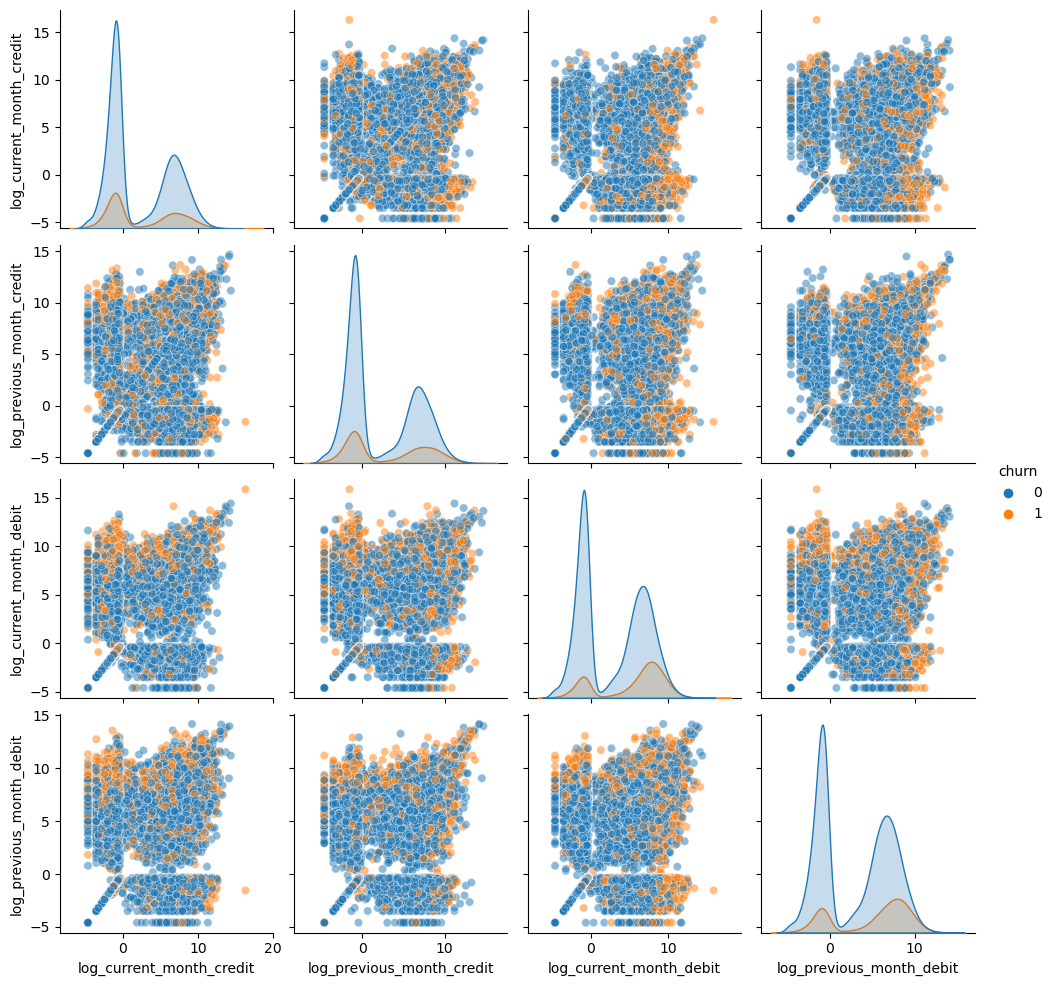

In [139]:
sns.pairplot(data1,vars=log_dr_cr_cols, hue = 'churn',plot_kws={'alpha':0.5})
plt.show()

Os padrões de crédito e débito mostram diferenças significativas nas distribuições para clientes desligados e não desligados.
* A distribuição bimodal/Double Bell Curve mostra que existem 2 tipos diferentes de clientes com 2 faixas de crédito e débito. Agora, durante a fase de modelagem, estes poderiam ser considerados como um conjunto separado de clientes
* Para valores de débito, vemos que há uma diferença significativa na distribuição de churn e não churn e isso pode acabar sendo uma característica importante

## Encoding

In [140]:
data_encoded = pd.get_dummies(data, drop_first=True)
data_encoded.head()

,customer_id,vintage,age,dependents,city,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,doy_ls_tran,woy_ls_tran,moy_ls_tran,dow_ls_tran,gender_Male,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student,customer_nw_category_2,customer_nw_category_3
0,1,2101,66,0,187.0,755.0,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,141.0,21.0,5.0,1.0,1,0,0,1,0,1,0
1,2,2348,35,0,NaN,3214.0,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,305.0,44.0,11.0,4.0,1,0,0,1,0,1,0
2,4,2194,31,0,146.0,41.0,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaN,NaN,NaN,NaN,1,0,1,0,0,1,0
3,5,2329,90,<NA>,1020.0,582.0,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,218.0,32.0,8.0,1.0,0,0,0,1,0,1,0
4,6,1579,42,2,1494.0,388.0,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,307.0,44.0,11.0,6.0,1,0,0,1,0,0,1


* Codificando as variáveis ​​usando a função get dummies pandas para que cada variável tenha um valor numérico associado a ela

#### Valores ausentes com a moda
* Preenchendo valores ausentes com a moda dos dados

In [141]:
def fill_mode(df):
    for column in df.columns:
        df[column].fillna(df[column].mode()[0], inplace=True)

In [142]:
fill_mode(data_encoded)

#### Segregando variáveis: variáveis independentes e dependentes
* Drop variável de insignificação

In [143]:
data_encoded = data_encoded.drop('customer_id', axis=1)

In [144]:
#seperating independent and dependent variables
x = data_encoded.drop(['churn'], axis=1)
y = data_encoded['churn']
x.shape, y.shape

((28382, 26), (28382,))

* Criação de recursos e variável de destino

In [145]:
data_encoded.columns

Index(['vintage', 'age', 'dependents', 'city', 'branch_code',
       'current_balance', 'previous_month_end_balance',
       'average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2',
       'current_month_credit', 'previous_month_credit', 'current_month_debit',
       'previous_month_debit', 'current_month_balance',
       'previous_month_balance', 'churn', 'doy_ls_tran', 'woy_ls_tran',
       'moy_ls_tran', 'dow_ls_tran', 'gender_Male', 'occupation_retired',
       'occupation_salaried', 'occupation_self_employed', 'occupation_student',
       'customer_nw_category_2', 'customer_nw_category_3'],
      dtype='object')

#### Dividindo os dados em conjunto de trem e conjunto de teste

In [146]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56)

#### Normalizando usando *min_max_scaler*

In [147]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [148]:
cols = train_x.columns
cols

Index(['vintage', 'age', 'dependents', 'city', 'branch_code',
       'current_balance', 'previous_month_end_balance',
       'average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2',
       'current_month_credit', 'previous_month_credit', 'current_month_debit',
       'previous_month_debit', 'current_month_balance',
       'previous_month_balance', 'doy_ls_tran', 'woy_ls_tran', 'moy_ls_tran',
       'dow_ls_tran', 'gender_Male', 'occupation_retired',
       'occupation_salaried', 'occupation_self_employed', 'occupation_student',
       'customer_nw_category_2', 'customer_nw_category_3'],
      dtype='object')

In [149]:
train_x_scaled = scaler.fit_transform(train_x)
train_x_scaled = pd.DataFrame(train_x_scaled, columns=cols)
train_x_scaled.head()

,vintage,age,dependents,city,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,doy_ls_tran,woy_ls_tran,moy_ls_tran,dow_ls_tran,gender_Male,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student,customer_nw_category_2,customer_nw_category_3
0,0.928007,0.348315,0.000000,0.378034,0.499686,0.002316,0.001973,0.000966,0.003331,3.390372e-04,2.498086e-07,3.027644e-04,2.726267e-04,0.002006,0.001990,0.975275,0.980392,1.000000,1.000000,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.929255,0.516854,0.000000,0.009102,0.199749,0.000937,0.000563,0.000011,0.003458,4.527154e-04,5.686025e-04,3.205393e-04,5.657036e-08,0.000690,0.000806,0.925824,0.941176,1.000000,0.333333,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.956305,0.808989,0.000000,0.618932,0.232796,0.001390,0.000922,0.000114,0.003467,4.197765e-07,2.625107e-07,2.675286e-04,3.214611e-05,0.001119,0.000852,1.000000,1.000000,1.000000,0.166667,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.642530,0.258427,0.000000,0.906553,0.210625,0.001194,0.000870,0.000132,0.003326,1.354118e-08,8.468088e-09,1.495576e-08,1.414259e-08,0.000903,0.000857,0.780220,0.784314,0.818182,0.833333,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.897628,0.494382,0.019231,0.665049,0.019034,0.010039,0.011464,0.011463,0.013612,3.685034e-02,3.081111e-02,2.246654e-02,7.511766e-02,0.010526,0.016360,0.969780,0.980392,1.000000,0.666667,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [150]:
test_x_scaled = scaler.transform(test_x)
test_x_scaled = pd.DataFrame(test_x_scaled, columns=cols)
test_x_scaled.head()

,vintage,age,dependents,city,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,doy_ls_tran,woy_ls_tran,moy_ls_tran,dow_ls_tran,gender_Male,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student,customer_nw_category_2,customer_nw_category_3
0,0.933000,0.516854,0.019231,0.747573,0.021334,0.001343,0.000952,0.000220,0.004242,5.128721e-05,1.270213e-08,2.176213e-04,1.016690e-03,0.001019,0.001008,0.983516,1.000000,1.000000,0.333333,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.841448,0.337079,0.000000,0.665049,0.018406,0.001781,0.001474,0.000652,0.004185,1.083294e-07,6.774470e-08,1.196461e-07,1.131407e-07,0.001503,0.001463,0.829670,0.843137,0.818182,0.333333,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.917603,0.629213,0.000000,0.374393,0.047689,0.001189,0.000873,0.000020,0.003524,3.723824e-07,2.328724e-07,1.846289e-05,8.061277e-06,0.000900,0.000838,0.659341,0.666667,0.636364,0.500000,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.712859,0.269663,0.000000,0.618932,0.230914,0.000911,0.000578,0.000902,0.007583,3.249883e-07,2.032341e-07,3.589383e-07,3.394222e-07,0.000613,0.000564,0.791209,0.803922,0.818182,0.333333,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.927591,0.853933,0.000000,0.248180,0.068605,0.000986,0.000654,0.000241,0.003854,1.489530e-07,9.314897e-08,1.645134e-07,6.689368e-03,0.000690,0.001284,0.065934,0.058824,0.000000,0.666667,1.0,1.0,0.0,0.0,0.0,0.0,1.0


## Model Building

In [151]:
#importando regressão logística e pontuação de precisão métrica
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.metrics import accuracy_score
# Criando instância de regressão logística
logreg = LogReg()

# Ajustando o modelo
logreg.fit(train_x, train_y)

# PPrevendo
train_predict = logreg.predict(train_x)
train_predict

# Calculando pontuação de precisão
k = accuracy_score(train_predict, train_y)
print('Precisão_score do treinamento', k )

# previsão sobre o conjunto de testes e pontuação de precisão
test_predict = logreg.predict(test_x)
k = accuracy_score(test_predict, test_y)
print('Precisão_pontuação do teste    ', k )



Precisão_score do treinamento 0.8238748473174857
Precisão_pontuação do teste     0.8279312288613303


* A regressão logística funciona muito bem e é capaz de fornecer precisão superior a 80% para conjunto de treinamento e teste

### Usando Regularização

In [152]:
C_values = [10, 1, 0.1, 0.001]

for c in C_values:
    clf = LogisticRegression(C=c, penalty='l1', solver='liblinear')
    clf.fit(train_x, train_y)
    print('C:', c)
    print('Coeficientes de cada feature:', clf.coef_)
    print('Precisão nos dados de treino:', clf.score(train_x, train_y))
    print('Precisão nos dados de teste:', clf.score(test_x, test_y))
    print('')

C: 10
Coeficientes de cada feature: [[-2.32682909e-05 -4.93188487e-03  2.87837123e-02  4.87748712e-06
   9.41825762e-05 -1.72412518e-04 -4.60648087e-06  1.89772471e-04
  -9.49062194e-06 -8.63300843e-06 -2.87683730e-06  1.14309080e-05
   4.82457540e-06 -9.25666428e-06 -3.11864710e-05 -5.27906891e-03
  -2.14827351e-03  2.05491754e-01  4.11393497e-02  1.11225202e-01
  -7.08125464e-02 -4.46443835e-02  1.74415074e-01 -2.11550455e-01
  -1.06312668e-02  3.46933608e-02]]
Precisão nos dados de treino: 0.8237808888471295
Precisão nos dados de teste: 0.8275084554678692

C: 1
Coeficientes de cada feature: [[-3.17477687e-05 -4.99006756e-03  2.87260504e-02  4.02830066e-06
   9.41072857e-05 -1.72408504e-04 -4.60154182e-06  1.89752509e-04
  -9.48180750e-06 -8.62959089e-06 -2.87724442e-06  1.14360510e-05
   4.82483227e-06 -9.26847821e-06 -3.11819317e-05 -5.35452519e-03
  -2.17139761e-03  2.07382919e-01  4.06031060e-02  1.09031067e-01
  -2.02570945e-02  0.00000000e+00  2.17779085e-01 -1.64846568e-01
  -

* À medida que o valor de C aumenta, a constante de regularização diminui (C é o inverso da constante de regularização)
* Portanto, a maioria dos recursos se associa ao valor do coeficiente 0
* Esta também pode ser uma técnica de seleção de recursos durante a construção do modelo
______

## 🇧🇷 Parecer

A análise univariada mostrou que os clientes autônomos do sexo masculino, clientes com saldo atual baixo e clientes jovens (0-25 anos) são mais propensos a abandonar. A análise bivariada mostrou que há uma correlação significativa entre esses fatores e a rotatividade.

A análise multivariada confirmou essas conclusões e mostrou que esses fatores são os mais importantes para prever a rotatividade.

O modelo de regressão logística foi capaz de fornecer precisão superior a 80% para conjunto de treinamento e teste, o que indica que esses fatores são relevantes para a previsão da rotatividade.

A análise dos dados também mostrou que a maioria dos recursos se associou ao valor do coeficiente 0 ao usar regularização. Isso indica que esses recursos não são importantes para prever a rotatividade.


____________

## 🇺🇸 Report
The univariate analysis revealed that self-employed male customers, those with low current balances, and younger customers (0-25 years old) are more likely to churn. The bivariate analysis highlighted a significant correlation between these factors and turnover.

The multivariate analysis confirmed these findings and demonstrated that these factors are the most crucial in predicting turnover.

The logistic regression model achieved over 80% accuracy for both the training and test sets, indicating the relevance of these factors in predicting turnover.

Furthermore, the data analysis indicated that most features were associated with a coefficient value of 0 when using regularization. This suggests that these features are not significant in predicting turnover.
______




## 🇧🇷 Recomendacao

Baseado nessas conclusões, as seguintes estratégias podem ser usadas para reduzir a rotatividade de clientes:

* **Desenvolver programas de fidelidade para clientes autônomos do sexo masculino.**
* **Oferecer incentivos para aumentar o saldo atual dos clientes.**
* **Desenvolver programas direcionados para clientes jovens (0-25 anos), especialmente se forem autônomos.**

Além disso, a empresa pode considerar as seguintes melhorias para o modelo:

* **Adicionar mais recursos, como dados demográficos adicionais, histórico de compras ou dados de uso do produto.**
* **Usar um modelo mais complexo, como uma rede neural.**
* **Obter mais dados coletando dados adicionais dos clientes ou integrando dados de outras fontes.**

Com base nessas melhorias, a empresa pode melhorar a precisão do modelo e identificar novos insights que podem ajudar a reduzir a rotatividade de clientes.

______
## 🇺🇸 Recommendation
Based on these conclusions, the following strategies can be used to reduce customer churn:

* **Develop loyalty programs for self-employed male customers.**
* **Offer incentives to increase current customer balances.**
* **Create targeted programs for young customers (0-25 years old), especially if they are self-employed.**

Moreover, the company can consider the following enhancements for the model:

* **Add more resources, such as additional demographic data, purchase history, or product usage data.**
* **Use a more complex model, such as a neural network.**
* **Acquire more data by collecting additional customer information or integrating data from other sources.**

With these improvements, the company can enhance the model's accuracy and identify new insights that could aid in reducing customer churn.